In [43]:
import pickle
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy
import matplotlib.animation as animation
import pickle
import pandas as pd

In [44]:
# Assuming G is your NetworkX graph
def print_first_three_nodes_and_edges(G):
    # First 3 nodes
    print("First 3 Nodes and their features:")
    for node, data in list(G.nodes(data=True))[:3]:
        print(f"Node: {node}, Features: {data}")

    # First 3 edges
    print("\nFirst 3 Edges and their features:")
    for u, v, data in list(G.edges(data=True))[:3]:
        print(f"Edge: ({u}, {v}), Features: {data}")

# Example usage


# Load Ashish Graphs

In [45]:
df1=pd.read_csv(r"C:\Users\orije\Urban-Rail-Network-Resilience-Failure-Recovery-\New_York_MTA\Edge_CSV.csv")
edge_list_W = list(zip(df1['Source'], df1['Target']))
agg_G = nx.Graph()
agg_G.add_edges_from(edge_list_W)

print("Number of nodes:", agg_G.number_of_nodes())
print("Number of edges:", agg_G.number_of_edges())

Number of nodes: 463
Number of edges: 510


In [46]:
df1=pd.read_csv(r"Washington_DC\Edge_CSV.csv")
df2=pd.read_csv(r"Boston_MBTA\Edge_CSV.csv")
df3=pd.read_csv(r"Chicago_L\Edge_CSV.csv")
df4=pd.read_csv(r"Delhi_Metro\Edge_CSV.csv")
df5=pd.read_csv(r"Tokyo_Metro\Edge_CSV.csv")
df6=pd.read_csv(r"Paris_Metro\Edge_CSV.csv")
df7=pd.read_csv(r"Shanghai_Metro\Edge_CSV.csv")
df8=pd.read_csv(r"London_Metro\Edges_all.csv",encoding='latin-1')
df9=pd.read_csv(r"New_York_MTA\Edge_CSV.csv",encoding='latin-1')

edge_list_W = list(zip(df1['Source'], df1['Target']))
edge_list_B = list(zip(df2['Source'], df2['Target']))
edge_list_C = list(zip(df3['Source'], df3['Target']))
edge_list_D = list(zip(df4['Source'], df4['Target']))
edge_list_T = list(zip(df5['Source'], df5['Target']))
edge_list_P = list(zip(df6['Source'], df6['Target']))
edge_list_S = list(zip(df7['Source'], df7['Target']))
edge_list_L = list(zip(df8['Source'], df8['Target']))
edge_list_N = list(zip(df9['Source'], df9['Target']))

G_W = nx.Graph()
G_W.add_edges_from(edge_list_W)

G_B = nx.Graph()
G_B.add_edges_from(edge_list_B)

G_C = nx.Graph()
G_C.add_edges_from(edge_list_C)

G_D = nx.Graph()
G_D.add_edges_from(edge_list_D)

G_T = nx.Graph()
G_T.add_edges_from(edge_list_T)

G_P = nx.Graph()
G_P.add_edges_from(edge_list_P)

G_S = nx.Graph()
G_S.add_edges_from(edge_list_S)

G_L = nx.Graph()
G_L.add_edges_from(edge_list_L)

G_N = nx.Graph()
G_N.add_edges_from(edge_list_N)

## Load Comms physics graphs

In [82]:
# Load the graph from the pickle file
with open(rf"C:\Users\orije\recoverability\spaces\L\L-Boston.pkl", 'rb') as file:
    bos_G = pickle.load(file)
import networkx as nx



# Manually create an undirected graph
agg_G = nx.Graph()
agg_G.add_nodes_from(bos_G.nodes(data=True))
# Add edges to the undirected graph
for u, v in bos_G.edges():
    if not agg_G.has_edge(u, v) and not agg_G.has_edge(v, u):
        agg_G.add_edge(u, v)

In [85]:
# Print node features
print("Node features:")
for node, features in bos_G.nodes(data=True):
    print(f"Node {node}: {features}")

# Print edge features
print("\nEdge features:")
for u, v, features in bos_G.edges(data=True):
    print(f"Edge ({u}, {v}): {features}")

Node features:
Node 0: {'lat': 42.395428, 'lon': -71.142483, 'name': 'Alewife', 'original_ids': [7418]}
Node 1: {'lat': 42.39674, 'lon': -71.121815, 'name': 'Davis', 'original_ids': [7837, 7838]}
Node 2: {'lat': 42.3884, 'lon': -71.119149, 'name': 'Porter', 'original_ids': [8440, 8441]}
Node 3: {'lat': 42.373362, 'lon': -71.118956, 'name': 'Harvard', 'original_ids': [7998, 7999]}
Node 4: {'lat': 42.365304, 'lon': -71.103621, 'name': 'Central', 'original_ids': [7798, 7799]}
Node 5: {'lat': 42.362355, 'lon': -71.085605, 'name': 'Kendall/MIT', 'original_ids': [8095, 8096]}
Node 6: {'lat': 42.361187, 'lon': -71.071505, 'name': 'Charles/MGH', 'original_ids': [7765, 7766]}
Node 7: {'lat': 42.356395, 'lon': -71.062424, 'name': 'Park Street', 'original_ids': [8419, 8420]}
Node 8: {'lat': 42.355518, 'lon': -71.060225, 'name': 'Downtown Crossing', 'original_ids': [7855, 7856, 7853, 7854]}
Node 9: {'lat': 42.352271, 'lon': -71.055242, 'name': 'South Station', 'original_ids': [8722, 8723]}
Node 10

In [ ]:
G=bos_G
import networkx as nx

# Sample graph with node and edge attributes if not already defined
# Uncomment and modify as necessary
# G = nx.Graph()
# G.add_node(1, name="Node1", average_flow=3.5)
# G.add_node(2, name="Node2", capacity=7)
# G.add_edge(1, 2, weight=5, flow_rate=2.1)

# Collect all unique attribute keys for nodes and edges
node_features = set()
for _, features in G.nodes(data=True):
    node_features.update(features.keys())

edge_features = set()
for _, _, features in G.edges(data=True):
    edge_features.update(features.keys())

# Print the feature types for nodes and edges
print("Node feature types:")
for feature in node_features:
    print(f" - {feature}")

print("\nEdge feature types:")
for feature in edge_features:
    print(f" - {feature}")


In [48]:
sigma=1

In [49]:
# agg_G=copy.deepcopy(G_D)

In [50]:
nodes_to_remove=np.random.choice(list(agg_G.nodes()), size=int(sigma*len(agg_G)), replace=False)

In [51]:
nodes_to_remove

array([50, 11, 42, 29, 26, 32, 19, 12, 21, 18, 53, 30, 51,  0,  7, 15, 44,
       58, 54, 10, 22,  9, 16, 56, 24,  5, 14, 41, 28,  1, 57, 52, 23, 55,
       27, 49, 43,  6, 46,  4, 48, 20, 31, 37, 60, 59, 34, 47, 40,  3,  8,
       36, 33, 25,  2, 35, 38, 17, 13, 45, 39])

In [52]:
import time
import itertools

In [53]:
def calculate_network_performance(G):
    # sd = dict(nx.shortest_path_length(G))

    if G.number_of_nodes() == 0:  # Handle the case when the graph is empty
        return 0

    gc_size = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)][0]
    
    return gc_size




In [54]:
# Degree based recovery

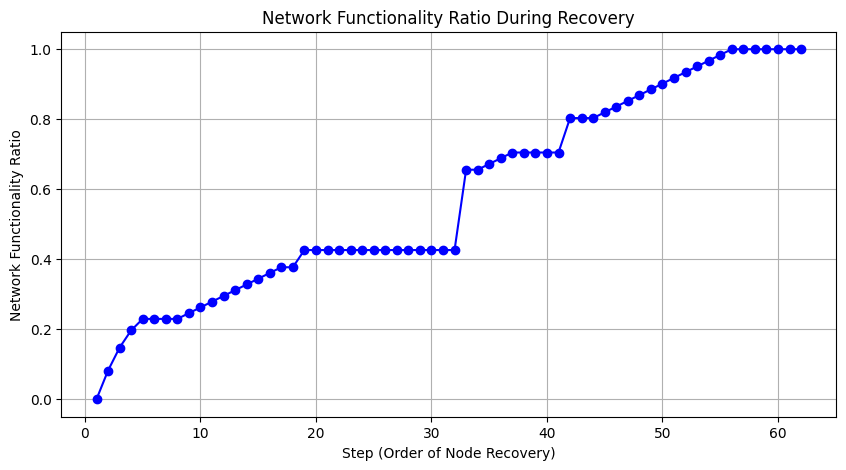

Time taken in Degree Recovery: 0.00299835205078125


In [55]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy
import matplotlib.animation as animation


nodes_by_degree=[]
# Function to simulate  recovery, also returns performance data


# Function to simulate recovery, also returns performance data
def simulate_recovery_degree(G, nodes_to_remove):
    # H = copy.deepcopy(G)
    # H.remove_nodes_from(nodes_to_remove)
    seq_added_degree = []

    H = nx.Graph()
    recovery_performance = [0]
    initial_performance = calculate_network_performance(G)
    
    recovery_performance = [calculate_network_performance(H) / initial_performance]
    degree_centrality = nx.degree_centrality(G)
    nodes_sorted_by_degree = sorted(G.nodes, key=lambda n: G.degree[n], reverse=True)
    i = 1
    for node in nodes_sorted_by_degree:
        H.add_node(node, **G.nodes[node])
        H.add_edges_from(list(G.edges(node)))
        seq_added_degree.append(node)
        
        current_performance = calculate_network_performance(H)
        functionality_ratio = current_performance / initial_performance
        recovery_performance.append(functionality_ratio)
        i += 1
    
    return recovery_performance, seq_added_degree


# Function to plot functionality ratios
def plot_functionality_ratio(recovery_performance):
    plt.figure(figsize=(10, 5))
    steps = list(range(1, len(recovery_performance) + 1))
    plt.plot(steps, recovery_performance, marker='o', linestyle='-', color='blue')
    plt.title('Network Functionality Ratio During Recovery')
    plt.xlabel('Step (Order of Node Recovery)')
    plt.ylabel('Network Functionality Ratio')
    plt.grid(True)
    plt.show()

# Measure execution time and plot performance
start_time = time.time()
recovery_performance_degree, seq_added_degree = simulate_recovery_degree(agg_G, nodes_to_remove)
end_time = time.time()
time_taken_degree = end_time - start_time

plot_functionality_ratio(recovery_performance_degree)
print("Time taken in Degree Recovery:", time_taken_degree)



In [56]:
#Betweeness

In [57]:
print("Number of nodes:", agg_G.number_of_nodes())
print("Number of edges:", agg_G.number_of_edges())

Number of nodes: 61
Number of edges: 62


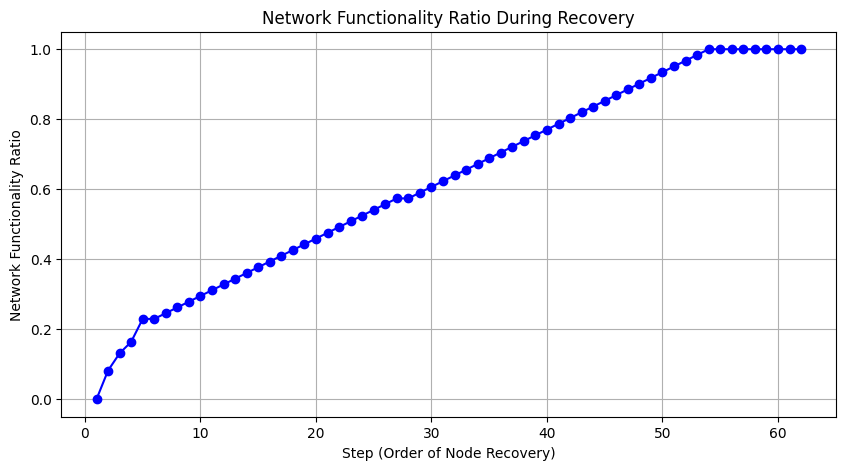

In [58]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy


nodes_by_betweenness=[]
def simulate_recovery_betweenness(G, recovery_measure='betweenness'):
    H = nx.Graph()  # Start with an empty graph
    seq_added_betweenness=[]
    # Calculate the initial performance for the functionality ratio
    initial_performance = calculate_network_performance(G)
    
    recovery_performance = []
    recovery_performance=[calculate_network_performance(H)/initial_performance]
    # Obtain betweenness centrality for the original graph
    betweenness = nx.betweenness_centrality(G)
    
    if recovery_measure == 'betweenness':
        nodes_sorted_by_betweenness = sorted(nodes_to_remove, key=lambda n: betweenness[n], reverse=True)
    else:
        raise ValueError("Invalid recovery measure. Use 'betweenness'.")
    for index, node in enumerate(nodes_sorted_by_betweenness):
        H.add_node(node, **G.nodes[node])
        H.add_edges_from(list(G.edges(node)))
        seq_added_betweenness.append(node)
        
        current_performance = calculate_network_performance(H)
        functionality_ratio = current_performance / initial_performance
        recovery_performance.append(functionality_ratio)
    
    return recovery_performance, seq_added_betweenness


start_time=time.time()
recovery_performance_betweenness, seq_added_betweenness = simulate_recovery_betweenness(agg_G)
end_time=time.time()
time_taken_betweenness=end_time-start_time
plot_functionality_ratio(recovery_performance_betweenness)

In [59]:
#Greedy

In [60]:
# nodes_by_greedy = []

# # Unified greedy recovery function
# def simulate_recovery_greedy(G, nodes_to_remove):
#     centrality = {n: G.degree[n] for n in G.nodes()}  # You can choose any centrality measure if needed
#     nodes_sorted_by_centrality = sorted(nodes_to_remove, key=lambda n: centrality[n], reverse=True)
    
#     H = nx.Graph()  # Start with an empty graph
    
#     initial_performance = calculate_network_performance(G)
#     recovery_performance = [0]  # Initial performance is zero since H is empty
#     node_sequence = []
    
#     remaining_nodes = set(nodes_to_remove)
#     while remaining_nodes:
#         best_performance = float('-inf')
#         best_node = None

#         # Test recovery for each remaining node
#         for node in remaining_nodes:
#             test_graph = copy.deepcopy(H)
#             test_graph.add_node(node)
#             # Reconnect with neighbors that are still in the graph
#             for neighbor in G.neighbors(node):
#                 if neighbor in test_graph:
#                     test_graph.add_edge(node, neighbor)

#             # Calculate performance if this node were added back
#             test_performance = calculate_network_performance(test_graph)
#             if test_performance > best_performance:
#                 best_performance = test_performance
#                 best_node = node

#         # Add the best node back to H for real
#         if best_node is not None:
#             H.add_node(best_node, **G.nodes[best_node])
#             H.add_edges_from(list(G.edges(best_node)))
#             node_sequence.append(best_node)
#             functionality_ratio = best_performance / initial_performance
#             recovery_performance.append(functionality_ratio)
#             remaining_nodes.remove(best_node)

#     return recovery_performance, node_sequence


# start_time=time.time()
# recovery_performance_greedy, seq_added_greedy = simulate_recovery_greedy(agg_G, nodes_to_remove)
# end_time=time.time()
# time_taken_greedy=end_time-start_time
# plot_functionality_ratio(recovery_performance_greedy)

In [61]:
#Random

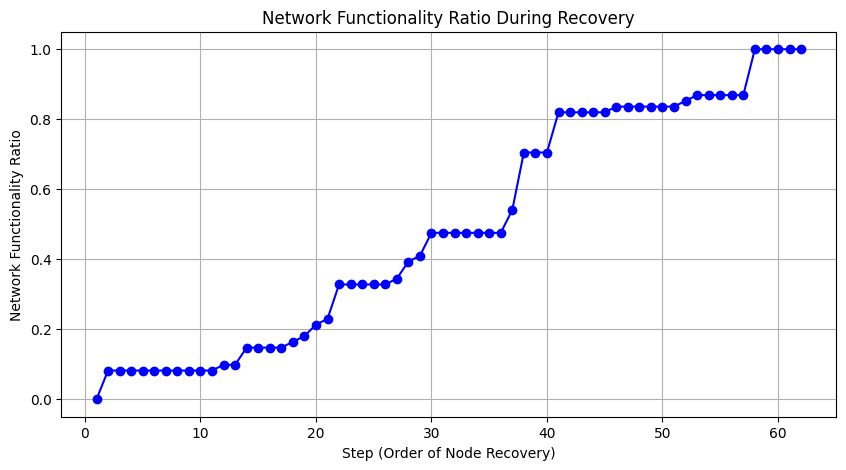

In [62]:
nodes_by_random=[]
def simulate_recovery_random(G, nodes_to_remove):
    H = nx.Graph()
    seq_added_random=[]
    initial_performance = calculate_network_performance(G)
    
    recovery_performance = []
    recovery_performance=[calculate_network_performance(H)/initial_performance]
    nodes_shuffled = np.random.permutation(nodes_to_remove)
    nodes_sorted_by_random=nodes_shuffled
    for index, node in enumerate(nodes_shuffled):
        H.add_node(node, **G.nodes[node])
        H.add_edges_from(list(G.edges(node)))
        seq_added_random.append(node)

        current_performance = calculate_network_performance(H)
        # nodes_by_random.append((node, G.nodes[node]['name']))
        functionality_ratio = current_performance / initial_performance
        recovery_performance.append(functionality_ratio)
        #print(f'Functionality after recovering node {index + 1} ({node}): {functionality_ratio}')

    return recovery_performance, seq_added_random

start_time=time.time()
recovery_performance_random, seq_added_random = simulate_recovery_random(agg_G, nodes_to_remove)
end_time=time.time()
time_taken_random=end_time-start_time
plot_functionality_ratio(recovery_performance_random)

In [63]:
#Eigen

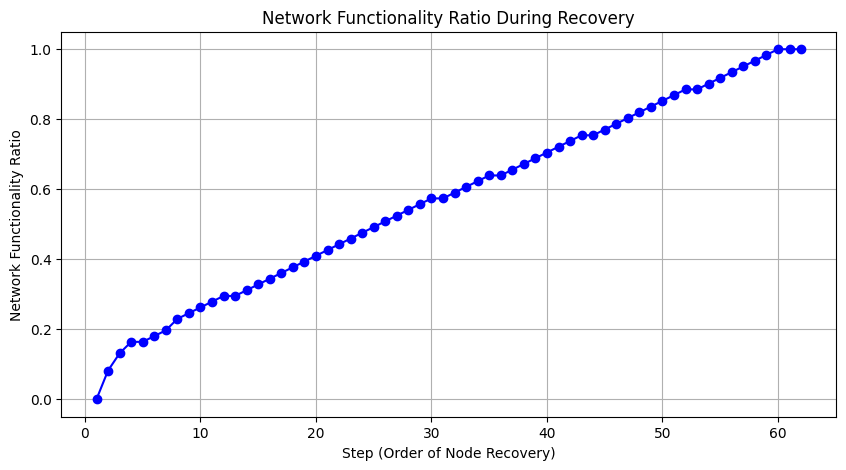

In [64]:
nodes_by_eigen=[]
def simulate_recovery_eigen(G, nodes_to_remove):
    H = nx.Graph()  
    seq_added_eigen=[]
    # Calculate the initial performance for the functionality ratio
    initial_performance = calculate_network_performance(G)
    
    recovery_performance = []
    recovery_performance=[calculate_network_performance(H)/initial_performance]
    # Try obtaining eigenvector centrality with more iterations and a higher tolerance
    try:
        centrality = nx.eigenvector_centrality(G, max_iter=5000, tol=1e-06)
    except nx.PowerIterationFailedConvergence:
        print("Eigenvector centrality failed to converge, trying with a random start vector.")
        nstart = {n: 1 for n in G.nodes()}  # Start with equal centrality assumption
        centrality = nx.eigenvector_centrality(G, max_iter=500, tol=1e-06, nstart=nstart)
    
    nodes_sorted_by_centrality = sorted(nodes_to_remove, key=lambda n: centrality[n], reverse=True)
    
    for index, node in enumerate(nodes_sorted_by_centrality):
        H.add_node(node, **G.nodes[node])
        H.add_edges_from(list(G.edges(node)))
        seq_added_eigen.append(node)
        
        # Calculate current performance and functionality ratio
        # nodes_by_eigen.append((node, G.nodes[node]['name']))
        current_performance = calculate_network_performance(H)
        functionality_ratio = current_performance / initial_performance
        recovery_performance.append(functionality_ratio)
        #print(f'Functionality after recovering node {index + 1}: {functionality_ratio}')
    
    return recovery_performance, seq_added_eigen


def plot_functionality_ratio(recovery_performance):
    plt.figure(figsize=(10, 5))
    steps = list(range(1, len(recovery_performance) + 1))
    plt.plot(steps, recovery_performance, marker='o', linestyle='-', color='blue')
    plt.title('Network Functionality Ratio During Recovery')
    plt.xlabel('Step (Order of Node Recovery)')
    plt.ylabel('Network Functionality Ratio')
    plt.grid(True)
    plt.show()
start_time=time.time()
recovery_performance_eigen, seq_added_eigen = simulate_recovery_eigen(agg_G, nodes_to_remove)
end_time=time.time()
time_taken_eigen=end_time-start_time
plot_functionality_ratio(recovery_performance_eigen)

In [65]:
#Closeness

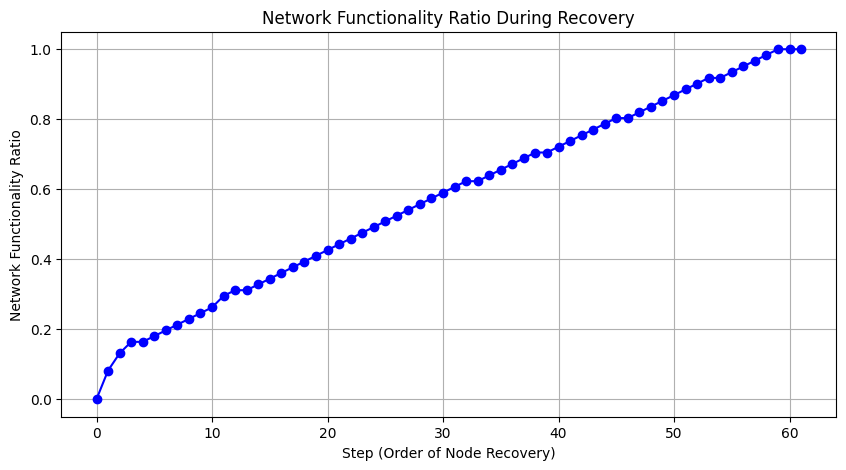

Time taken for recovery process: 0.0039980411529541016 seconds


In [66]:
import networkx as nx
import matplotlib.pyplot as plt
import copy
import time

def simulate_recovery_closeness(G, nodes_to_remove):
    H = nx.Graph()
    seq_added_closeness=[]
    # Calculate the initial performance for the functionality ratio
    initial_performance = calculate_network_performance(G)
    
    recovery_performance = [calculate_network_performance(H) / initial_performance]
    
    # Calculate closeness centrality for the nodes
    centrality = nx.closeness_centrality(G)
    
    # Sort removed nodes by their centrality in descending order
    nodes_sorted_by_centrality = sorted(nodes_to_remove, key=lambda n: centrality.get(n, 0), reverse=True)
    
    for index, node in enumerate(nodes_sorted_by_centrality):
        H.add_node(node, **G.nodes[node])
        H.add_edges_from(list(G.edges(node)))
        seq_added_closeness.append(node)
        
        # Calculate current performance and functionality ratio
        current_performance = calculate_network_performance(H)
        functionality_ratio = current_performance / initial_performance
        recovery_performance.append(functionality_ratio)
        #print(f'Functionality after recovering node {index + 1}: {functionality_ratio}')
    
    return recovery_performance, seq_added_closeness

def plot_functionality_ratio(recovery_performance):
    plt.figure(figsize=(10, 5))
    steps = list(range(len(recovery_performance)))
    plt.plot(steps, recovery_performance, marker='o', linestyle='-', color='blue')
    plt.title('Network Functionality Ratio During Recovery')
    plt.xlabel('Step (Order of Node Recovery)')
    plt.ylabel('Network Functionality Ratio')
    plt.grid(True)
    plt.show()

start_time = time.time()
recovery_performance_closeness, seq_added_closeness = simulate_recovery_closeness(agg_G, nodes_to_remove)
end_time = time.time()
time_taken_closeness = end_time - start_time

plot_functionality_ratio(recovery_performance_closeness)
print(f'Time taken for recovery process: {time_taken_closeness} seconds')


In [67]:
#PageRank

In [32]:
# def simulate_recovery_pagerank(G, nodes_to_remove):
#     H = copy.deepcopy(G)
#     H.remove_nodes_from(nodes_to_remove)
#     seq_added_pagerank = []
#     # Calculate the initial performance for the functionality ratio
#     initial_performance = calculate_network_performance(G)
    
#     recovery_performance = [calculate_network_performance(H) / initial_performance]
    
#     # Calculate PageRank centrality for the nodes
#     centrality = nx.pagerank(G)
    
#     # Sort removed nodes by their centrality in descending order
#     nodes_sorted_by_centrality = sorted(nodes_to_remove, key=lambda n: centrality.get(n, 0), reverse=True)
    
#     for index, node in enumerate(nodes_sorted_by_centrality):
#         H.add_node(node)
#         seq_added_pagerank.append(node)
#         # Reconnect with neighbors that are still in the graph
#         for neighbor in G.neighbors(node):
#             if neighbor in H:
#                 H.add_edge(node, neighbor)
        
#         # Calculate current performance and functionality ratio
#         current_performance = calculate_network_performance(H)
#         functionality_ratio = current_performance / initial_performance
#         recovery_performance.append(functionality_ratio)
#         #print(f'Functionality after recovering node {index + 1}: {functionality_ratio}')
    
#     return recovery_performance, seq_added_pagerank

# # Example usage
# start_time = time.time()
# recovery_performance_pagerank, seq_added_pagerank = simulate_recovery_pagerank(agg_G, nodes_to_remove)
# end_time = time.time()
# time_taken_pagerank = end_time - start_time

# plot_functionality_ratio(recovery_performance_pagerank)

In [33]:
# Domirank Centrality

Functionality after recovering node 1: 0.08196721311475409
Functionality after recovering node 2: 0.14754098360655737
Functionality after recovering node 3: 0.19672131147540983
Functionality after recovering node 4: 0.22950819672131148
Functionality after recovering node 5: 0.22950819672131148
Functionality after recovering node 6: 0.22950819672131148
Functionality after recovering node 7: 0.22950819672131148
Functionality after recovering node 8: 0.22950819672131148
Functionality after recovering node 9: 0.22950819672131148
Functionality after recovering node 10: 0.22950819672131148
Functionality after recovering node 11: 0.26229508196721313
Functionality after recovering node 12: 0.29508196721311475
Functionality after recovering node 13: 0.32786885245901637
Functionality after recovering node 14: 0.3770491803278688
Functionality after recovering node 15: 0.4098360655737705
Functionality after recovering node 16: 0.47540983606557374
Functionality after recovering node 17: 0.475409836

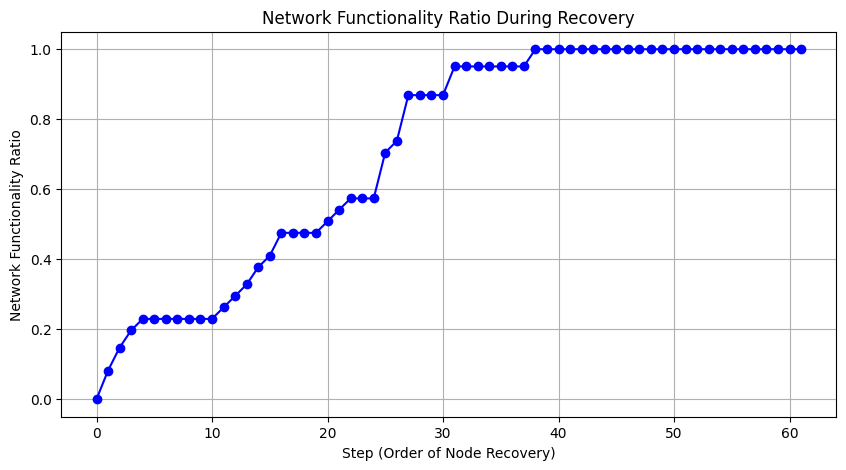

Time taken for DomiRank-based recovery: 0.007996082305908203 seconds


In [34]:
import copy
import numpy as np
import networkx as nx
import time

def domirank(G, sigma=-1, dt=0.1, epsilon=1e-5, maxIter=1000, checkStep=10):
    if isinstance(G, nx.Graph):  # Check if it is a NetworkX graph
        G = nx.to_scipy_sparse_array(G)  # Convert to scipy sparse array if it is a graph
    else:
        G = G.copy()
    if sigma == -1:
        sigma = optimal_sigma(G, dt=dt, epsilon=epsilon, maxIter=maxIter, checkStep=checkStep)
    pGAdj = sigma * G.astype(np.float32)
    Psi = np.zeros(pGAdj.shape[0]).astype(np.float32)
    maxVals = np.zeros(int(maxIter / checkStep)).astype(np.float32)
    dt = np.float32(dt)
    j = 0
    boundary = epsilon * pGAdj.shape[0] * dt
    for i in range(maxIter):
        tempVal = ((pGAdj @ (1 - Psi)) - Psi) * dt
        Psi += tempVal.real
        if i % checkStep == 0:
            if np.abs(tempVal).sum() < boundary:
                break
            maxVals[j] = tempVal.max()
            if i == 0:
                initialChange = maxVals[j]
            if j > 0:
                if maxVals[j] > maxVals[j - 1] and maxVals[j - 1] > maxVals[j - 2]:
                    return False, Psi
            j += 1

    return True, Psi

def find_eigenvalue(G, minVal=0, maxVal=1, maxDepth=100, dt=0.1, epsilon=1e-5, maxIter=100, checkStep=10):
    x = (minVal + maxVal) / G.sum(axis=-1).max()
    minValStored = 0
    for i in range(maxDepth):
        if maxVal - minVal < epsilon:
            break
        if domirank(G, x, dt, epsilon, maxIter, checkStep)[0]:
            minVal = x
            x = (minVal + maxVal) / 2
            minValStored = minVal
        else:
            maxVal = (x + maxVal) / 2
            x = (minVal + maxVal) / 2
        if minVal == 0:
            print(f'Current Interval : [-inf, -{1 / maxVal}]')
        else:
            print(f'Current Interval : [-{1 / minVal}, -{1 / maxVal}]')
    finalVal = (maxVal + minVal) / 2
    return -1 / finalVal

def process_iteration(q, i, sigma, spArray, maxIter, checkStep, dt, epsilon, sampling):
    tf, domiDist = domirank(spArray, sigma, dt=dt, epsilon=epsilon, maxIter=maxIter, checkStep=checkStep)
    domiAttack = generate_attack(domiDist)
    ourTempAttack, __ = network_attack_sampled(spArray, domiAttack, sampling=sampling)
    finalErrors = ourTempAttack.sum()
    q.put(finalErrors)

def optimal_sigma(spArray, endVal=0, startval=0.000001, iterationNo=100, dt=0.1, epsilon=1e-5, maxIter=100, checkStep=10, maxDepth=100, sampling=0):
    if endVal == 0:
        endVal = find_eigenvalue(spArray, maxDepth=maxDepth, dt=dt, epsilon=epsilon, maxIter=maxIter, checkStep=checkStep)
    import multiprocessing as mp
    endval = -0.9999 / endVal
    tempRange = np.arange(startval, endval + (endval - startval) / iterationNo, (endval - startval) / iterationNo)
    processes = []
    q = mp.Queue()
    for i, sigma in enumerate(tempRange):
        p = mp.Process(target=process_iteration, args=(q, i, sigma, spArray, maxIter, checkStep, dt, epsilon, sampling))
        p.start()
        processes.append(p)

    results = []
    for p in processes:
        p.join()
        result = q.get()
        results.append(result)
    finalErrors = np.array(results)
    minEig = np.where(finalErrors == finalErrors.min())[0][-1]
    minEig = tempRange[minEig]
    return minEig, finalErrors

optimal_sigma_value = 0.26


def simulate_recovery_domirank(G, nodes_to_remove):
    H = nx.Graph()
    seq_added_domirank = []
    # Calculate the initial performance for the functionality ratio
    initial_performance = calculate_network_performance(G)
    
    recovery_performance = [calculate_network_performance(H) / initial_performance]
    
    # Calculate DomiRank centrality for the nodes
    converged, domirank_centrality = domirank(nx.to_scipy_sparse_array(G), sigma=optimal_sigma_value)
    if not converged:
        print("Warning: DomiRank calculation did not converge. Results may be inaccurate.")
    
    # Mapping nodes to their DomiRank centrality values
    domirank_dict = {node: domirank_centrality[i] for i, node in enumerate(G.nodes)}
    
    # Sort removed nodes by their centrality in descending order
    nodes_sorted_by_domirank = sorted(nodes_to_remove, key=lambda n: domirank_dict.get(n, 0), reverse=True)
    
    for index, node in enumerate(nodes_sorted_by_domirank):
        H.add_node(node, **G.nodes[node])
        H.add_edges_from(list(G.edges(node)))
        seq_added_domirank.append(node)
        
        # Calculate current performance and functionality ratio
        current_performance = calculate_network_performance(H)
        functionality_ratio = current_performance / initial_performance
        recovery_performance.append(functionality_ratio)
        print(f'Functionality after recovering node {index + 1}: {functionality_ratio}')
    
    return recovery_performance, seq_added_domirank


# Example usage
start_time = time.time()
recovery_performance_domirank, seq_added_domirank = simulate_recovery_domirank(agg_G, nodes_to_remove)
end_time = time.time()
time_taken_domirank = end_time - start_time
plot_functionality_ratio(recovery_performance_domirank)

print(f'Time taken for DomiRank-based recovery: {time_taken_domirank} seconds')


## Dynamic Betweenness

In [95]:
# import networkx as nx
# import numpy as np
# import matplotlib.pyplot as plt
# import copy

# def simulate_recovery_dynamic_betweenness(G, nodes_to_remove):
#     H = copy.deepcopy(G)
#     H.remove_nodes_from(nodes_to_remove)
#     seq_added_dynamic_betweenness = []
#     initial_performance = calculate_network_performance(G)
#     recovery_performance = [calculate_network_performance(H) / initial_performance]

#     # Initialize the subgraph S with the remaining nodes in H
#     S = set(H.nodes())
#     H_all = set(nodes_to_remove)
#     index=0
#     while H_all:
#         # Identify potential nodes to add from H_all to S
#         potential_add_nodes = list(H_all)
#         betweenness_scores = {}

#         for node in potential_add_nodes:
#             # Calculate the betweenness centrality if the node were added to S
#             test_graph = H.copy()
#             test_graph.add_node(node)
#             for neighbor in G.neighbors(node):
#                 if neighbor in test_graph:
#                     test_graph.add_edge(node, neighbor)
#             betweenness_scores[node] = nx.betweenness_centrality(test_graph)[node]

#         # Add the node with the highest betweenness centrality to S
#         best_node = max(betweenness_scores, key=betweenness_scores.get)
#         H.add_node(best_node)
#         seq_added_dynamic_betweenness.append(best_node)
#         for neighbor in G.neighbors(best_node):
#             if neighbor in H:
#                 H.add_edge(best_node, neighbor)
        
#         # Update the recovery performance
#         current_performance = calculate_network_performance(H)
#         functionality_ratio = current_performance / initial_performance
#         recovery_performance.append(functionality_ratio)
#         print(f'Functionality after recovering node {index + 1}: {functionality_ratio}')
#         index=index+1
#         # Remove the best node from H_all
#         H_all.remove(best_node)

#     return recovery_performance, seq_added_dynamic_betweenness

# # Example usage
# start_time = time.time()
# recovery_performance_dynamic_betweenness, seq_added_dynamic_betweenness = simulate_recovery_dynamic_betweenness(agg_G, nodes_to_remove)
# end_time = time.time()
# time_taken_dynamic_betweenness = end_time - start_time

# plot_functionality_ratio(recovery_performance_dynamic_betweenness)
# print(f'Time taken for Dynamic Betweenness Recovery: {time_taken_dynamic_betweenness} seconds')


# Dynamic Degree

In [96]:
# def simulate_recovery_dynamic_degree(G, nodes_to_remove):
#     H = copy.deepcopy(G)
#     H.remove_nodes_from(nodes_to_remove)
#     seq_added_dynamic_degree = []
#     initial_performance = calculate_network_performance(G)
#     recovery_performance = [calculate_network_performance(H) / initial_performance]

#     H_all = set(nodes_to_remove)
#     index = 0

#     while H_all:
#         potential_add_nodes = list(H_all)
#         degree_scores = {node: G.degree[node] for node in potential_add_nodes}

#         # Add the node with the highest degree centrality to the graph
#         best_node = max(degree_scores, key=degree_scores.get)
#         H.add_node(best_node)
#         seq_added_dynamic_degree.append(best_node)
#         for neighbor in G.neighbors(best_node):
#             if neighbor in H:
#                 H.add_edge(best_node, neighbor)

#         current_performance = calculate_network_performance(H)
#         functionality_ratio = current_performance / initial_performance
#         recovery_performance.append(functionality_ratio)
#         print(f'Functionality after recovering node {index + 1}: {functionality_ratio}')
#         index += 1

#         H_all.remove(best_node)

#     return recovery_performance, seq_added_dynamic_degree

# # Example usage
# start_time = time.time()
# recovery_performance_dynamic_degree, seq_added_dynamic_degree = simulate_recovery_dynamic_degree(agg_G, nodes_to_remove)
# end_time = time.time()
# time_taken_dynamic_degree = end_time - start_time

# plot_functionality_ratio(recovery_performance_dynamic_degree)
# print(f'Time taken for Dynamic Degree Recovery: {time_taken_dynamic_degree} seconds')


# Dynamic Closeness

In [97]:
# def simulate_recovery_dynamic_closeness(G, nodes_to_remove):
#     H = copy.deepcopy(G)
#     H.remove_nodes_from(nodes_to_remove)
#     seq_added_dynamic_closeness = []
#     initial_performance = calculate_network_performance(G)
#     recovery_performance = [calculate_network_performance(H) / initial_performance]

#     H_all = set(nodes_to_remove)
#     index = 0

#     while H_all:
#         potential_add_nodes = list(H_all)
#         closeness_scores = {}

#         for node in potential_add_nodes:
#             test_graph = H.copy()
#             test_graph.add_node(node)
#             for neighbor in G.neighbors(node):
#                 if neighbor in test_graph:
#                     test_graph.add_edge(node, neighbor)
#             closeness_scores[node] = nx.closeness_centrality(test_graph)[node]

#         # Add the node with the highest closeness centrality to the graph
#         best_node = max(closeness_scores, key=closeness_scores.get)
#         H.add_node(best_node)
#         seq_added_dynamic_closeness.append(best_node)
#         for neighbor in G.neighbors(best_node):
#             if neighbor in H:
#                 H.add_edge(best_node, neighbor)

#         current_performance = calculate_network_performance(H)
#         functionality_ratio = current_performance / initial_performance
#         recovery_performance.append(functionality_ratio)
#         print(f'Functionality after recovering node {index + 1}: {functionality_ratio}')
#         index += 1

#         H_all.remove(best_node)

#     return recovery_performance, seq_added_dynamic_closeness

# # Example usage
# start_time = time.time()
# recovery_performance_dynamic_closeness, seq_added_dynamic_closeness = simulate_recovery_dynamic_closeness(agg_G, nodes_to_remove)
# end_time = time.time()
# time_taken_dynamic_closeness = end_time - start_time

# plot_functionality_ratio(recovery_performance_dynamic_closeness)
# print(f'Time taken for Dynamic Closeness Recovery: {time_taken_dynamic_closeness} seconds')


# Dynamic Eigen Vector

In [98]:
# def simulate_recovery_dynamic_eigenvector(G, nodes_to_remove):
#     H = copy.deepcopy(G)
#     H.remove_nodes_from(nodes_to_remove)
#     seq_added_dynamic_eigenvector = []
#     initial_performance = calculate_network_performance(G)
#     recovery_performance = [calculate_network_performance(H) / initial_performance]

#     H_all = set(nodes_to_remove)
#     index = 0

#     while H_all:
#         potential_add_nodes = list(H_all)
#         eigenvector_scores = {}

#         for node in potential_add_nodes:
#             test_graph = H.copy()
#             test_graph.add_node(node)
#             for neighbor in G.neighbors(node):
#                 if neighbor in test_graph:
#                     test_graph.add_edge(node, neighbor)
#             eigenvector_scores[node] = nx.eigenvector_centrality(test_graph, max_iter=5000, tol=1e-06)[node]

#         # Add the node with the highest eigenvector centrality to the graph
#         best_node = max(eigenvector_scores, key=eigenvector_scores.get)
#         H.add_node(best_node)
#         seq_added_dynamic_eigenvector.append(best_node)
#         for neighbor in G.neighbors(best_node):
#             if neighbor in H:
#                 H.add_edge(best_node, neighbor)

#         current_performance = calculate_network_performance(H)
#         functionality_ratio = current_performance / initial_performance
#         recovery_performance.append(functionality_ratio)
#         print(f'Functionality after recovering node {index + 1}: {functionality_ratio}')
#         index += 1

#         H_all.remove(best_node)

#     return recovery_performance, seq_added_dynamic_eigenvector

# # Example usage
# start_time = time.time()
# recovery_performance_dynamic_eigenvector, seq_added_dynamic_eigenvector = simulate_recovery_dynamic_eigenvector(agg_G, nodes_to_remove)
# end_time = time.time()
# time_taken_dynamic_eigenvector = end_time - start_time

# plot_functionality_ratio(recovery_performance_dynamic_eigenvector)
# print(f'Time taken for Dynamic Eigenvector Recovery: {time_taken_dynamic_eigenvector} seconds')


# Dynamic Pagerank

In [99]:
# def simulate_recovery_dynamic_pagerank(G, nodes_to_remove):
#     H = copy.deepcopy(G)
#     H.remove_nodes_from(nodes_to_remove)
#     seq_added_dynamic_pagerank = []
#     initial_performance = calculate_network_performance(G)
#     recovery_performance = [calculate_network_performance(H) / initial_performance]

#     H_all = set(nodes_to_remove)
#     index = 0

#     while H_all:
#         potential_add_nodes = list(H_all)
#         pagerank_scores = {}

#         for node in potential_add_nodes:
#             test_graph = H.copy()
#             test_graph.add_node(node)
#             for neighbor in G.neighbors(node):
#                 if neighbor in test_graph:
#                     test_graph.add_edge(node, neighbor)
#             pagerank_scores[node] = nx.pagerank(test_graph)[node]

#         # Add the node with the highest PageRank to the graph
#         best_node = max(pagerank_scores, key=pagerank_scores.get)
#         H.add_node(best_node)
#         seq_added_dynamic_pagerank.append(best_node)
#         for neighbor in G.neighbors(best_node):
#             if neighbor in H:
#                 H.add_edge(best_node, neighbor)

#         current_performance = calculate_network_performance(H)
#         functionality_ratio = current_performance / initial_performance
#         recovery_performance.append(functionality_ratio)
#         print(f'Functionality after recovering node {index + 1}: {functionality_ratio}')
#         index += 1

#         H_all.remove(best_node)

#     return recovery_performance, seq_added_dynamic_pagerank

# # Example usage
# start_time = time.time()
# recovery_performance_dynamic_pagerank, seq_added_dynamic_pagerank = simulate_recovery_dynamic_pagerank(agg_G, nodes_to_remove)
# end_time = time.time()
# time_taken_dynamic_pagerank = end_time - start_time

# plot_functionality_ratio(recovery_performance_dynamic_pagerank)
# print(f'Time taken for Dynamic PageRank Recovery: {time_taken_dynamic_pagerank} seconds')


In [100]:
    for node, data in list(agg_G.nodes(data=True))[:3]:
        print(f"Node: {node}, Features: {data}")

Node: 440, Features: {}
Node: 77, Features: {}
Node: 75, Features: {}


## Ashis's Trail plots

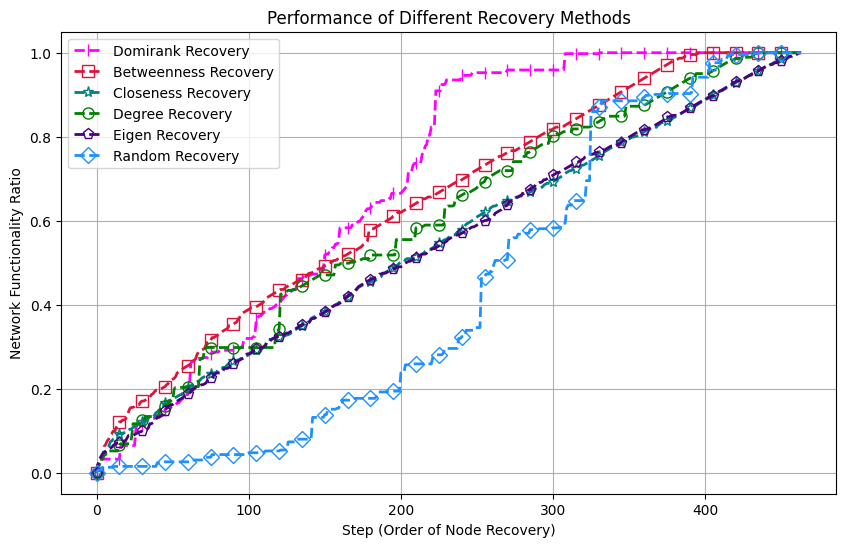

In [101]:
import matplotlib.pyplot as plt
colors = ['crimson', 'teal', 'green','indigo', 'dodgerblue', 'fuchsia']
Q = 2  # Assuming Q is your linewidth
marker_style = ['s', '*', 'o', 'p', 'D', 'x', '|']

# Plot the performance ratios
plt.figure(figsize=(10, 6))
plt.plot(recovery_performance_domirank, label='Domirank Recovery', color=colors[-1], linestyle='--', marker=marker_style[6], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.plot(recovery_performance_betweenness, label='Betweenness Recovery',color=colors[0], linestyle='--', marker=marker_style[0], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.plot(recovery_performance_closeness, label='Closeness Recovery',color=colors[1], linestyle='--', marker=marker_style[1], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.plot(recovery_performance_degree, label='Degree Recovery',color=colors[2], linestyle='--', marker=marker_style[2], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.plot(recovery_performance_eigen, label='Eigen Recovery',color=colors[3], linestyle='--', marker=marker_style[3], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.plot(recovery_performance_random, label='Random Recovery', color=colors[4], linestyle='--', marker=marker_style[4], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)

# Set labels and title
plt.xlabel('Step (Order of Node Recovery)')
plt.ylabel('Network Functionality Ratio')
plt.title('Performance of Different Recovery Methods')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [37]:
 def plot_area_recovery(recovery_performance, type):
    # Scale the ratios between 0 and 1
    max_ratio = max(recovery_performance)
    scaled_ratios = [ratio / max_ratio for ratio in recovery_performance]

    steps = list(range(1, len(scaled_ratios) + 1))
    
    # Calculate the area using the trapezoidal rule
    area = np.trapz(scaled_ratios, steps)
    
    # Normalize the area between 0 and 1
    normalized_area = (area / len(scaled_ratios))
    
    print(f'Normalized area under the {type} recovery curve: {normalized_area:.2f}')  # Print with two decimal places
    

plot_area_recovery(recovery_performance_domirank, "Domi Rank")
plot_area_recovery(recovery_performance_betweenness, "Betweenness")
plot_area_recovery(recovery_performance_degree, "Degree")
plot_area_recovery(recovery_performance_closeness, "Closeness")
plot_area_recovery(recovery_performance_eigen, "Eigen")
plot_area_recovery(recovery_performance_random, "Random")


Normalized area under the Domi Rank recovery curve: 0.70
Normalized area under the Betweenness recovery curve: 0.62
Normalized area under the Degree recovery curve: 0.57
Normalized area under the Closeness recovery curve: 0.57
Normalized area under the Eigen recovery curve: 0.57
Normalized area under the Random recovery curve: 0.48


# Everything in one code

In [78]:
import pickle
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import shutil
import numpy as np
import pandas as pd
import networkx as nx
from scipy.stats import kendalltau
from networkx.algorithms import clustering, average_shortest_path_length
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
import folium
import networkx as nx
from pyproj import CRS

# List of city names for the shapefiles
city_names = [
    "Athens","Budapest", "Cairo", "Copenhagen", "Montreal", "SanFrancisco", "Vienna",
    "Philadelphia", "Kobe", "Naples", "Marseille", "Toulouse", "Lyon",
    "Amsterdam", "Bilbao", "Lisbon", "Dubai", "Vancouver", "Rotterdam",
    "Rome", "Toronto", "BuenosAires", "Valencia", "Stockholm", "Oslo", "Warsaw"
]

manual_networks = {
    "Washington DC": {
        "Nodes": 91,
        "Avg_Degree": 2.04,
        "Avg_SPL": 11.51,
        "Density": 0.0227,
        "Diameter": 28.00,
        "Modularity_Index": 0.76,
        "Clustering_Coefficient": 0.0,
        "Number_of_Loops": sum(1 for cycle in nx.cycle_basis(G_W)),
        "Normalized_Number_of_Loops": sum(1 for cycle in nx.cycle_basis(G_W)) / (G_W.number_of_nodes()),
        "Recovery_AUC": {
            "Betweenness": 0.62,
            "Domirank": 0.71,
            "Degree": 0.60,
            "Closeness": 0.59,
            "Eigen": 0.59,
            "Random": 0.44
        }
    },
    "Boston": {
        "Nodes": 114,
        "Avg_Degree": 2.02,
        "Avg_SPL": 13.95,
        "Density": 0.0179,
        "Diameter": 34.0,
        "Modularity_Index": 0.81,
        "Clustering_Coefficient": 0.0058,
        "Number_of_Loops": sum(1 for cycle in nx.cycle_basis(G_B)),
        "Normalized_Number_of_Loops": sum(1 for cycle in nx.cycle_basis(G_B)) / (G_B.number_of_nodes()),
        "Recovery_AUC": {
            "Betweenness": 0.60,
            "Domirank": 0.51,
            "Degree": 0.55,
            "Closeness": 0.58,
            "Eigen": 0.56,
            "Random": 0.38
        }
    },
    "Chicago": {
        "Nodes": 143,
        "Avg_Degree": 2.08,
        "Avg_SPL": 15.99,
        "Density": 0.0147,
        "Diameter": 43.00,
        "Modularity_Index": 0.82,
        "Clustering_Coefficient": 0.0212,
        "Number_of_Loops": sum(1 for cycle in nx.cycle_basis(G_C)),
        "Normalized_Number_of_Loops": sum(1 for cycle in nx.cycle_basis(G_C)) / (G_C.number_of_nodes()),
        "Recovery_AUC": {
            "Betweenness": 0.60,
            "Domirank": 0.72,
            "Degree": 0.50,
            "Closeness": 0.56,
            "Eigen": 0.56,
            "Random": 0.40
        }
    },
    "Delhi": {
        "Nodes": 205,
        "Avg_Degree": 2.11,
        "Avg_SPL": 17.08,
        "Density": 0.0103,
        "Diameter": 54.00,
        "Modularity_Index": 0.82,
        "Clustering_Coefficient": 0.0,
        "Number_of_Loops": sum(1 for cycle in nx.cycle_basis(G_D)),
        "Normalized_Number_of_Loops": sum(1 for cycle in nx.cycle_basis(G_D)) / (G_D.number_of_nodes()),
        "Recovery_AUC": {
            "Betweenness": 0.57,
            "Domirank": 0.72,
            "Degree": 0.58,
            "Closeness": 0.55,
            "Eigen": 0.55,
            "Random": 0.43
        }
    },
    "Tokyo": {
        "Nodes": 223,
        "Avg_Degree": 2.40,
        "Avg_SPL": 10.64,
        "Density": 0.0108,
        "Diameter": 32.00,
        "Modularity_Index": 0.77,
        "Clustering_Coefficient": 0.0233,
        "Number_of_Loops": sum(1 for cycle in nx.cycle_basis(G_T)),
        "Normalized_Number_of_Loops": sum(1 for cycle in nx.cycle_basis(G_T)) / (G_T.number_of_nodes()),
        "Recovery_AUC": {
            "Betweenness": 0.70,
            "Domirank": 0.79,
            "Degree": 0.67,
            "Closeness": 0.59,
            "Eigen": 0.59,
            "Random": 0.54
        }
    },
    "Paris": {
        "Nodes": 302,
        "Avg_Degree": 2.37,
        "Avg_SPL": 11.98,
        "Density": 0.0079,
        "Diameter": 34.00,
        "Modularity_Index": 0.80,
        "Clustering_Coefficient": 0.0157,
        "Number_of_Loops": sum(1 for cycle in nx.cycle_basis(G_P)),
        "Normalized_Number_of_Loops": sum(1 for cycle in nx.cycle_basis(G_P)) / (G_P.number_of_nodes()),
        "Recovery_AUC": {
            "Betweenness": 0.70,
            "Domirank": 0.80,
            "Degree": 0.66,
            "Closeness": 0.58,
            "Eigen": 0.59,
            "Random": 0.54
        }
    },
    "Shanghai": {
        "Nodes": 345,
        "Avg_Degree": 2.30,
        "Avg_SPL": 16.00,
        "Density": 0.0067,
        "Diameter": 45.00,
        "Modularity_Index": 0.83,
        "Clustering_Coefficient": 0.0086,
        "Number_of_Loops": sum(1 for cycle in nx.cycle_basis(G_S)),
        "Normalized_Number_of_Loops": sum(1 for cycle in nx.cycle_basis(G_S)) / (G_S.number_of_nodes()),
        "Recovery_AUC": {
            "Betweenness": 0.65,
            "Domirank": 0.75,
            "Degree": 0.62,
            "Closeness": 0.56,
            "Eigen": 0.56,
            "Random": 0.48
        }
    },
    "London": {
        "Nodes": 369,
        "Avg_Degree": 2.33,
        "Avg_SPL": 13.73,
        "Density": 0.0063,
        "Diameter": 39.00,
        "Modularity_Index": 0.83,
        "Clustering_Coefficient": 0.0294,
        "Number_of_Loops": sum(1 for cycle in nx.cycle_basis(G_L)),
        "Normalized_Number_of_Loops": sum(1 for cycle in nx.cycle_basis(G_L)) / (G_L.number_of_nodes()),
        "Recovery_AUC": {
            "Betweenness": 0.69,
            "Domirank": 0.75,
            "Degree": 0.65,
            "Closeness": 0.57,
            "Eigen": 0.57,
            "Random": 0.50
        }
    },
    "New York": {
        "Nodes": 463,
        "Avg_Degree": 2.20,
        "Avg_SPL": 19.69,
        "Density": 0.0048,
        "Diameter": 57.00,
        "Modularity_Index": 0.88,
        "Clustering_Coefficient": 0.0279,
        "Number_of_Loops": sum(1 for cycle in nx.cycle_basis(G_N)),
        "Normalized_Number_of_Loops": sum(1 for cycle in nx.cycle_basis(G_N)) / (G_N.number_of_nodes()),
        "Recovery_AUC": {
            "Betweenness": 0.65,
            "Domirank": 0.70,
            "Degree": 0.60,
            "Closeness": 0.55,
            "Eigen": 0.55,
            "Random": 0.40
        }
    }
}

# Path for storing recovery plots
output_dir = "recovery_graphs"
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)  # Clear the directory if it exists
os.makedirs(output_dir)

# Placeholder for storing network results
network_results = {}

# Function to calculate basic network attributes
def calculate_network_attributes(G):

    
    num_nodes = G.number_of_nodes()
    avg_degree = np.mean([d for n, d in G.degree()])
    avg_spl = average_shortest_path_length(G) if nx.is_connected(G) else float('inf')
    density = nx.density(G)
    diameter = nx.diameter(G) if nx.is_connected(G) else float('inf')
    modularity_index = nx.algorithms.community.modularity(G, nx.algorithms.community.label_propagation_communities(G))
    clustering_coeff = nx.average_clustering(G)

    # Calculate the number of loops (cycles of length > 2)
    num_loops = sum(1 for cycle in nx.cycle_basis(G))
    
    # Calculate the normalized number of loops (loops per node)
    normalized_number_loops = num_loops / num_nodes if num_nodes > 0 else 0

    return {
        "Nodes": num_nodes,
        "Avg_Degree": avg_degree,
        "Avg_SPL": avg_spl,
        "Density": density,
        "Diameter": diameter,
        "Modularity_Index": modularity_index,
        "Clustering_Coefficient": clustering_coeff,
        "Number_of_Loops": num_loops,
        "Normalized_Number_of_Loops": normalized_number_loops
    }

# Function to calculate the area under the recovery curve (AUC)
def plot_area_recovery(recovery_performance, type):
    max_ratio = max(recovery_performance)
    scaled_ratios = [ratio / max_ratio for ratio in recovery_performance]

    steps = list(range(1, len(scaled_ratios) + 1))
    area = np.trapz(scaled_ratios, steps)
    normalized_area = (area / len(scaled_ratios))
    
    return normalized_area




# Main loop to process each city
for city_name in city_names:
    city_file = f"C:\\Users\\orije\\recoverability\\spaces\\L\\L-{city_name}.pkl"
    
    try:
        with open(city_file, 'rb') as file:
            bos_G = pickle.load(file)
        
        agg_G = nx.Graph()
        agg_G.add_nodes_from(bos_G.nodes(data=True))
        for u, v in bos_G.edges():
            if not agg_G.has_edge(u, v) and not agg_G.has_edge(v, u):
                agg_G.add_edge(u, v)
        
        # Calculate network attributes
        network_attributes = calculate_network_attributes(agg_G)

        # Randomly select nodes to remove
        nodes_to_remove = np.random.choice(list(agg_G.nodes()), size=int(sigma*len(agg_G)), replace=False)
        
        # Perform all recovery simulations
        recovery_performance_degree, _ = simulate_recovery_degree(agg_G, nodes_to_remove)
        recovery_performance_betweenness, _ = simulate_recovery_betweenness(agg_G)
        recovery_performance_random, _ = simulate_recovery_random(agg_G, nodes_to_remove)
        recovery_performance_eigen, _ = simulate_recovery_eigen(agg_G, nodes_to_remove)
        recovery_performance_closeness, _ = simulate_recovery_closeness(agg_G, nodes_to_remove)
        recovery_performance_domirank, _ = simulate_recovery_domirank(agg_G, nodes_to_remove)
        
        # Calculate the AUC for each recovery method
        recovery_auc = {
            "Domirank": plot_area_recovery(recovery_performance_domirank, "Domirank"),
            "Betweenness": plot_area_recovery(recovery_performance_betweenness, "Betweenness"),
            "Degree": plot_area_recovery(recovery_performance_degree, "Degree"),
            "Closeness": plot_area_recovery(recovery_performance_closeness, "Closeness"),
            "Eigen": plot_area_recovery(recovery_performance_eigen, "Eigen"),
            "Random": plot_area_recovery(recovery_performance_random, "Random")
        }

        colors = ['crimson', 'teal', 'green','indigo', 'dodgerblue', 'fuchsia']
        Q = 2  # Assuming Q is your linewidth
        marker_style = ['s', '*', 'o', 'p', 'D', 'x', '|']
        
        # Plot the performance ratios
        plt.figure(figsize=(10, 6))
        plt.plot(recovery_performance_domirank, label='Domirank Recovery', color=colors[-1], linestyle='--', marker=marker_style[6], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
        plt.plot(recovery_performance_betweenness, label='Betweenness Recovery',color=colors[0], linestyle='--', marker=marker_style[0], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
        plt.plot(recovery_performance_closeness, label='Closeness Recovery',color=colors[1], linestyle='--', marker=marker_style[1], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
        plt.plot(recovery_performance_degree, label='Degree Recovery',color=colors[2], linestyle='--', marker=marker_style[2], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
        plt.plot(recovery_performance_eigen, label='Eigen Recovery',color=colors[3], linestyle='--', marker=marker_style[3], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
        plt.plot(recovery_performance_random, label='Random Recovery', color=colors[4], linestyle='--', marker=marker_style[4], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
        
        # Set labels and title
        plt.xlabel('Step (Order of Node Recovery)')
        plt.ylabel('Network Functionality Ratio')
        plt.title('Performance of Different Recovery Methods')
        plt.legend()
        
        # Show plot
        plt.grid(True)
        
        plot_filename = os.path.join(output_dir, f"{city_name}_recovery_plot.png")
        plt.savefig(plot_filename)
        plt.close()
        
        # Store results in the network_results dictionary
        network_results[city_name] = {
            **network_attributes,
            'Recovery_AUC': recovery_auc
        }
    
    except FileNotFoundError:
        print(f"File for {city_name} not found. Skipping this city.")

# Combine manual networks with dynamically generated networks
network_results.update(manual_networks)

# Save the combined network results to a pickle file
with open('recovery_results.pkl', 'wb') as f:
    pickle.dump(network_results, f)

print("All results have been saved to 'recovery_results.pkl'.")


Functionality after recovering node 1: 0.08196721311475409
Functionality after recovering node 2: 0.14754098360655737
Functionality after recovering node 3: 0.19672131147540983
Functionality after recovering node 4: 0.22950819672131148
Functionality after recovering node 5: 0.22950819672131148
Functionality after recovering node 6: 0.22950819672131148
Functionality after recovering node 7: 0.22950819672131148
Functionality after recovering node 8: 0.22950819672131148
Functionality after recovering node 9: 0.22950819672131148
Functionality after recovering node 10: 0.22950819672131148
Functionality after recovering node 11: 0.26229508196721313
Functionality after recovering node 12: 0.29508196721311475
Functionality after recovering node 13: 0.32786885245901637
Functionality after recovering node 14: 0.3770491803278688
Functionality after recovering node 15: 0.4098360655737705
Functionality after recovering node 16: 0.47540983606557374
Functionality after recovering node 17: 0.475409836

In [88]:
network_results

{'Athens': {'Nodes': 61,
  'Avg_Degree': 2.0327868852459017,
  'Avg_SPL': 10.917486338797815,
  'Density': 0.033879781420765025,
  'Diameter': 32,
  'Modularity_Index': 0.5191207075962538,
  'Clustering_Coefficient': 0.0,
  'Number_of_Loops': 2,
  'Normalized_Number_of_Loops': 0.03278688524590164,
  'Recovery_AUC': {'Domirank': 0.7008196721311475,
   'Betweenness': 0.6159439450026442,
   'Degree': 0.5728450555261766,
   'Closeness': 0.5680856689582231,
   'Eigen': 0.5657059756742464,
   'Random': 0.34095716552088845}},
 'Budapest': {'Nodes': 48,
  'Avg_Degree': 2.0,
  'Avg_SPL': 7.662234042553192,
  'Density': 0.0425531914893617,
  'Diameter': 19,
  'Modularity_Index': 0.5494791666666666,
  'Clustering_Coefficient': 0.0,
  'Number_of_Loops': 1,
  'Normalized_Number_of_Loops': 0.020833333333333332,
  'Recovery_AUC': {'Domirank': 0.7431972789115646,
   'Betweenness': 0.6398809523809524,
   'Degree': 0.6428571428571429,
   'Closeness': 0.6020408163265306,
   'Eigen': 0.5960884353741497,
 

## Number of Loops and Normalized Loop comparison

In [87]:
import pickle
import pandas as pd

# Load the existing Recovery_results.pkl file
with open('recovery_results.pkl', 'rb') as f:
    results = pickle.load(f)

# Extract attributes into a DataFrame
network_data = []
for city, attributes in results.items():
    network_data.append({
        "Name": city,
        "Nodes": attributes["Nodes"],
        "Number_of_Loops": attributes.get("Number_of_Loops", 0),
        "Normalized_Number_of_Loops": attributes.get("Normalized_Number_of_Loops", 0),
        "Domirank_AUC": attributes["Recovery_AUC"].get("Domirank", None)
    })

network_df = pd.DataFrame(network_data)

# Display sorted by Number_of_Loops
sorted_by_loops = network_df.sort_values(by="Number_of_Loops", ascending=False)
print("Sorted by Number of Loops:")
print(sorted_by_loops[["Name", "Number_of_Loops", "Normalized_Number_of_Loops", "Domirank_AUC"]])

# Display sorted by Normalized_Number_of_Loops
sorted_by_normalized_loops = network_df.sort_values(by="Normalized_Number_of_Loops", ascending=False)
print("\nSorted by Normalized Number of Loops:")
print(sorted_by_normalized_loops[["Name", "Nodes", "Normalized_Number_of_Loops", "Domirank_AUC"]])


Sorted by Number of Loops:
             Name  Number_of_Loops  Normalized_Number_of_Loops  Domirank_AUC
33         London               62                    0.168022      0.750000
31          Paris               57                    0.188742      0.800000
32       Shanghai               53                    0.153623      0.750000
34       New York               48                    0.103672      0.700000
30          Tokyo               46                    0.206278      0.790000
29          Delhi               12                    0.058537      0.720000
21    BuenosAires                8                    0.102564      0.769231
6          Vienna                7                    0.071429      0.747990
28        Chicago                7                    0.048951      0.720000
7    Philadelphia                6                    0.120000      0.726275
22       Valencia                4                    0.042105      0.601809
15         Lisbon                3               

## Recovery Kendall Tau

In [69]:
import pickle
# Load the combined results from the pickle file
with open('recovery_results.pkl', 'rb') as f:
    network_results = pickle.load(f)

In [70]:
type(network_results)

dict

In [33]:
import pickle
import pandas as pd
from scipy.stats import kendalltau

# Load the combined results from the pickle file
with open('recovery_results.pkl', 'rb') as f:
    network_results = pickle.load(f)

# Initialize data storage for network attributes and recovery AUCs
attributes_list = []
recovery_methods = ["Random", "Closeness", "Betweenness", "Eigen", "Degree", "Domirank"]

# Extract attributes and Recovery_AUC values for each network
for city, data in network_results.items():
    attributes = {
        "Nodes": data.get("Nodes"),
        "Avg_Degree": data.get("Avg_Degree"),
        "Avg_SPL": data.get("Avg_SPL"),
        "Density": data.get("Density"),
        "Diameter": data.get("Diameter"),
        "Modularity_Index": data.get("Modularity_Index"),
        "Clustering_Coefficient": data.get("Clustering_Coefficient"),
    }
    # Add Recovery AUC for each method
    for method in recovery_methods:
        attributes[method] = data["Recovery_AUC"].get(method)
    
    attributes_list.append(attributes)

# Convert to DataFrame
df = pd.DataFrame(attributes_list)

# Compute Kendall Tau correlation for each attribute and recovery method
correlation_matrix = pd.DataFrame(index=df.columns[:-len(recovery_methods)], columns=recovery_methods)

for attr in df.columns[:-len(recovery_methods)]:
    for method in recovery_methods:
        tau, _ = kendalltau(df[attr], df[method])
        correlation_matrix.loc[attr, method] = tau

# Convert to float and display the result
correlation_matrix = correlation_matrix.astype(float)

# Print the correlation matrix
print("Kendall Tau Correlation Table:")
print(correlation_matrix)


Kendall Tau Correlation Table:
                          Random  Closeness  Betweenness     Eigen    Degree  \
Nodes                  -0.088061  -0.348048     0.110170 -0.256803  0.030431   
Avg_Degree              0.251221  -0.008745     0.399848  0.005256  0.358779   
Avg_SPL                -0.286437  -0.643589    -0.190558 -0.549928 -0.265770   
Density                 0.092749   0.348270    -0.108017  0.254026 -0.031987   
Diameter               -0.266455  -0.631872    -0.148726 -0.557475 -0.228493   
Modularity_Index        0.011824  -0.284506     0.087912 -0.179815  0.075885   
Clustering_Coefficient  0.120636  -0.205171     0.114270 -0.212010  0.066668   

                        Domirank  
Nodes                   0.081287  
Avg_Degree              0.443125  
Avg_SPL                -0.178602  
Density                -0.075885  
Diameter               -0.136644  
Modularity_Index        0.021959  
Clustering_Coefficient  0.023696  


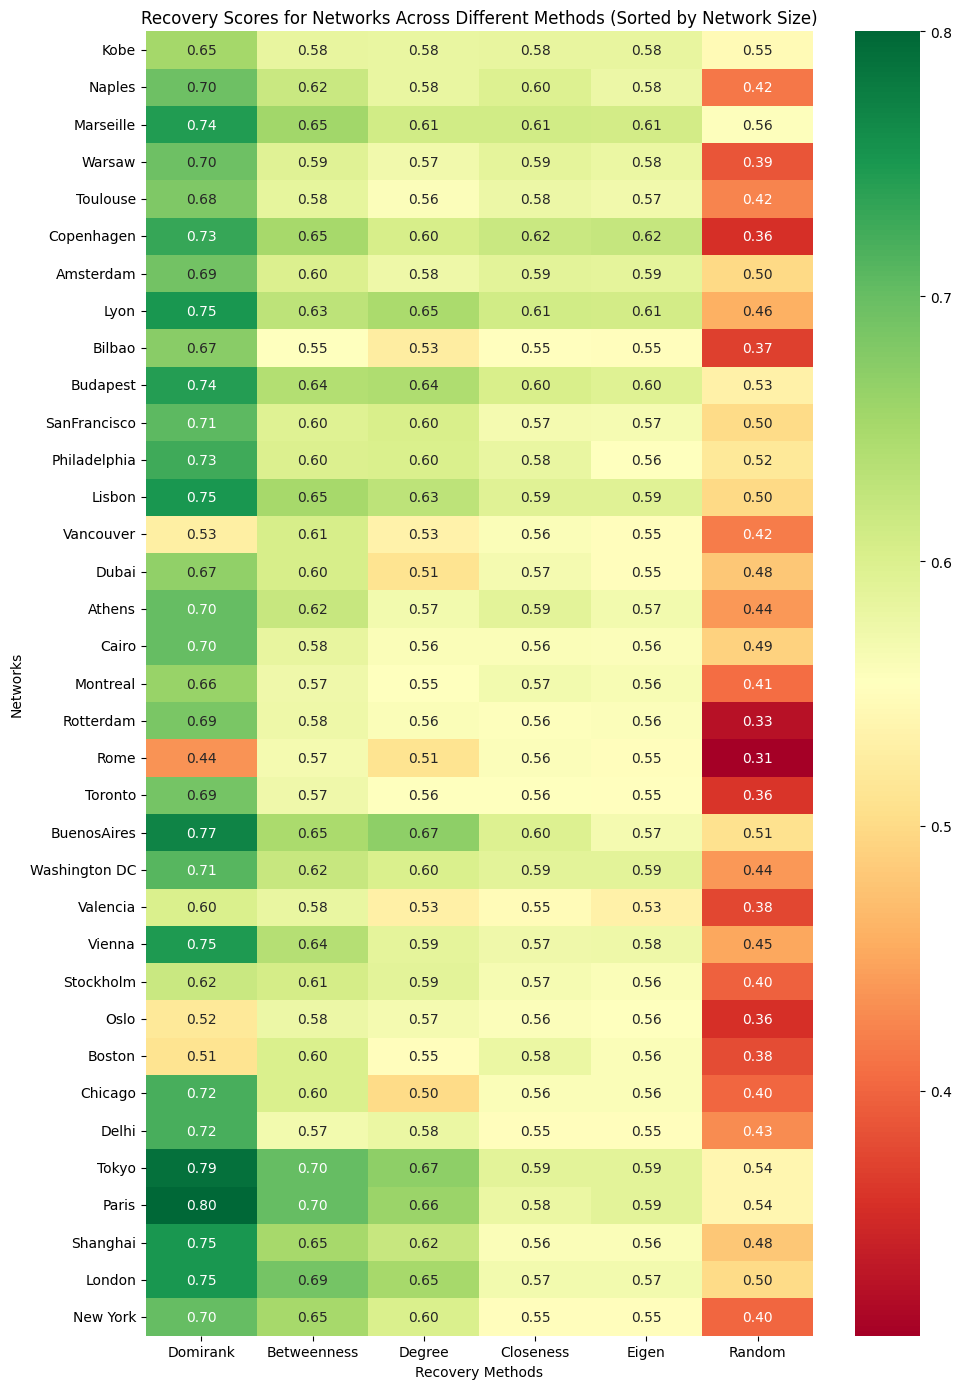

In [34]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the results from the 'failure_results.pkl' file (with recovery scores)
with open('recovery_results.pkl', 'rb') as f:
    results = pickle.load(f)

# Extract network attributes and recovery AUC scores from results
network_attr_df = pd.DataFrame({city: res for city, res in results.items()}).T
recovery_methods = ["Domirank", "Betweenness", "Degree", "Closeness", "Eigen", "Random"]

# Extract recovery AUC data for the heatmap
recovery_auc_df = pd.DataFrame({city: res['Recovery_AUC'] for city, res in results.items()}).T

# Sort the networks based on the number of nodes (ascending order)
sorted_networks = network_attr_df.sort_values(by="Nodes").index
recovery_auc_df_sorted = recovery_auc_df.loc[sorted_networks]

# Generate the heatmap for recovery scores across urban networks in ascending network size order
plt.figure(figsize=(10, 14))
sns.heatmap(recovery_auc_df_sorted, annot=True, cmap='RdYlGn', cbar=True, fmt=".2f")
plt.title("Recovery Scores for Networks Across Different Methods (Sorted by Network Size)")
plt.ylabel("Networks")
plt.xlabel("Recovery Methods")
plt.tight_layout()

# Save and show the heatmap
plt.savefig("recovery_heatmap_sorted.png")
plt.show()


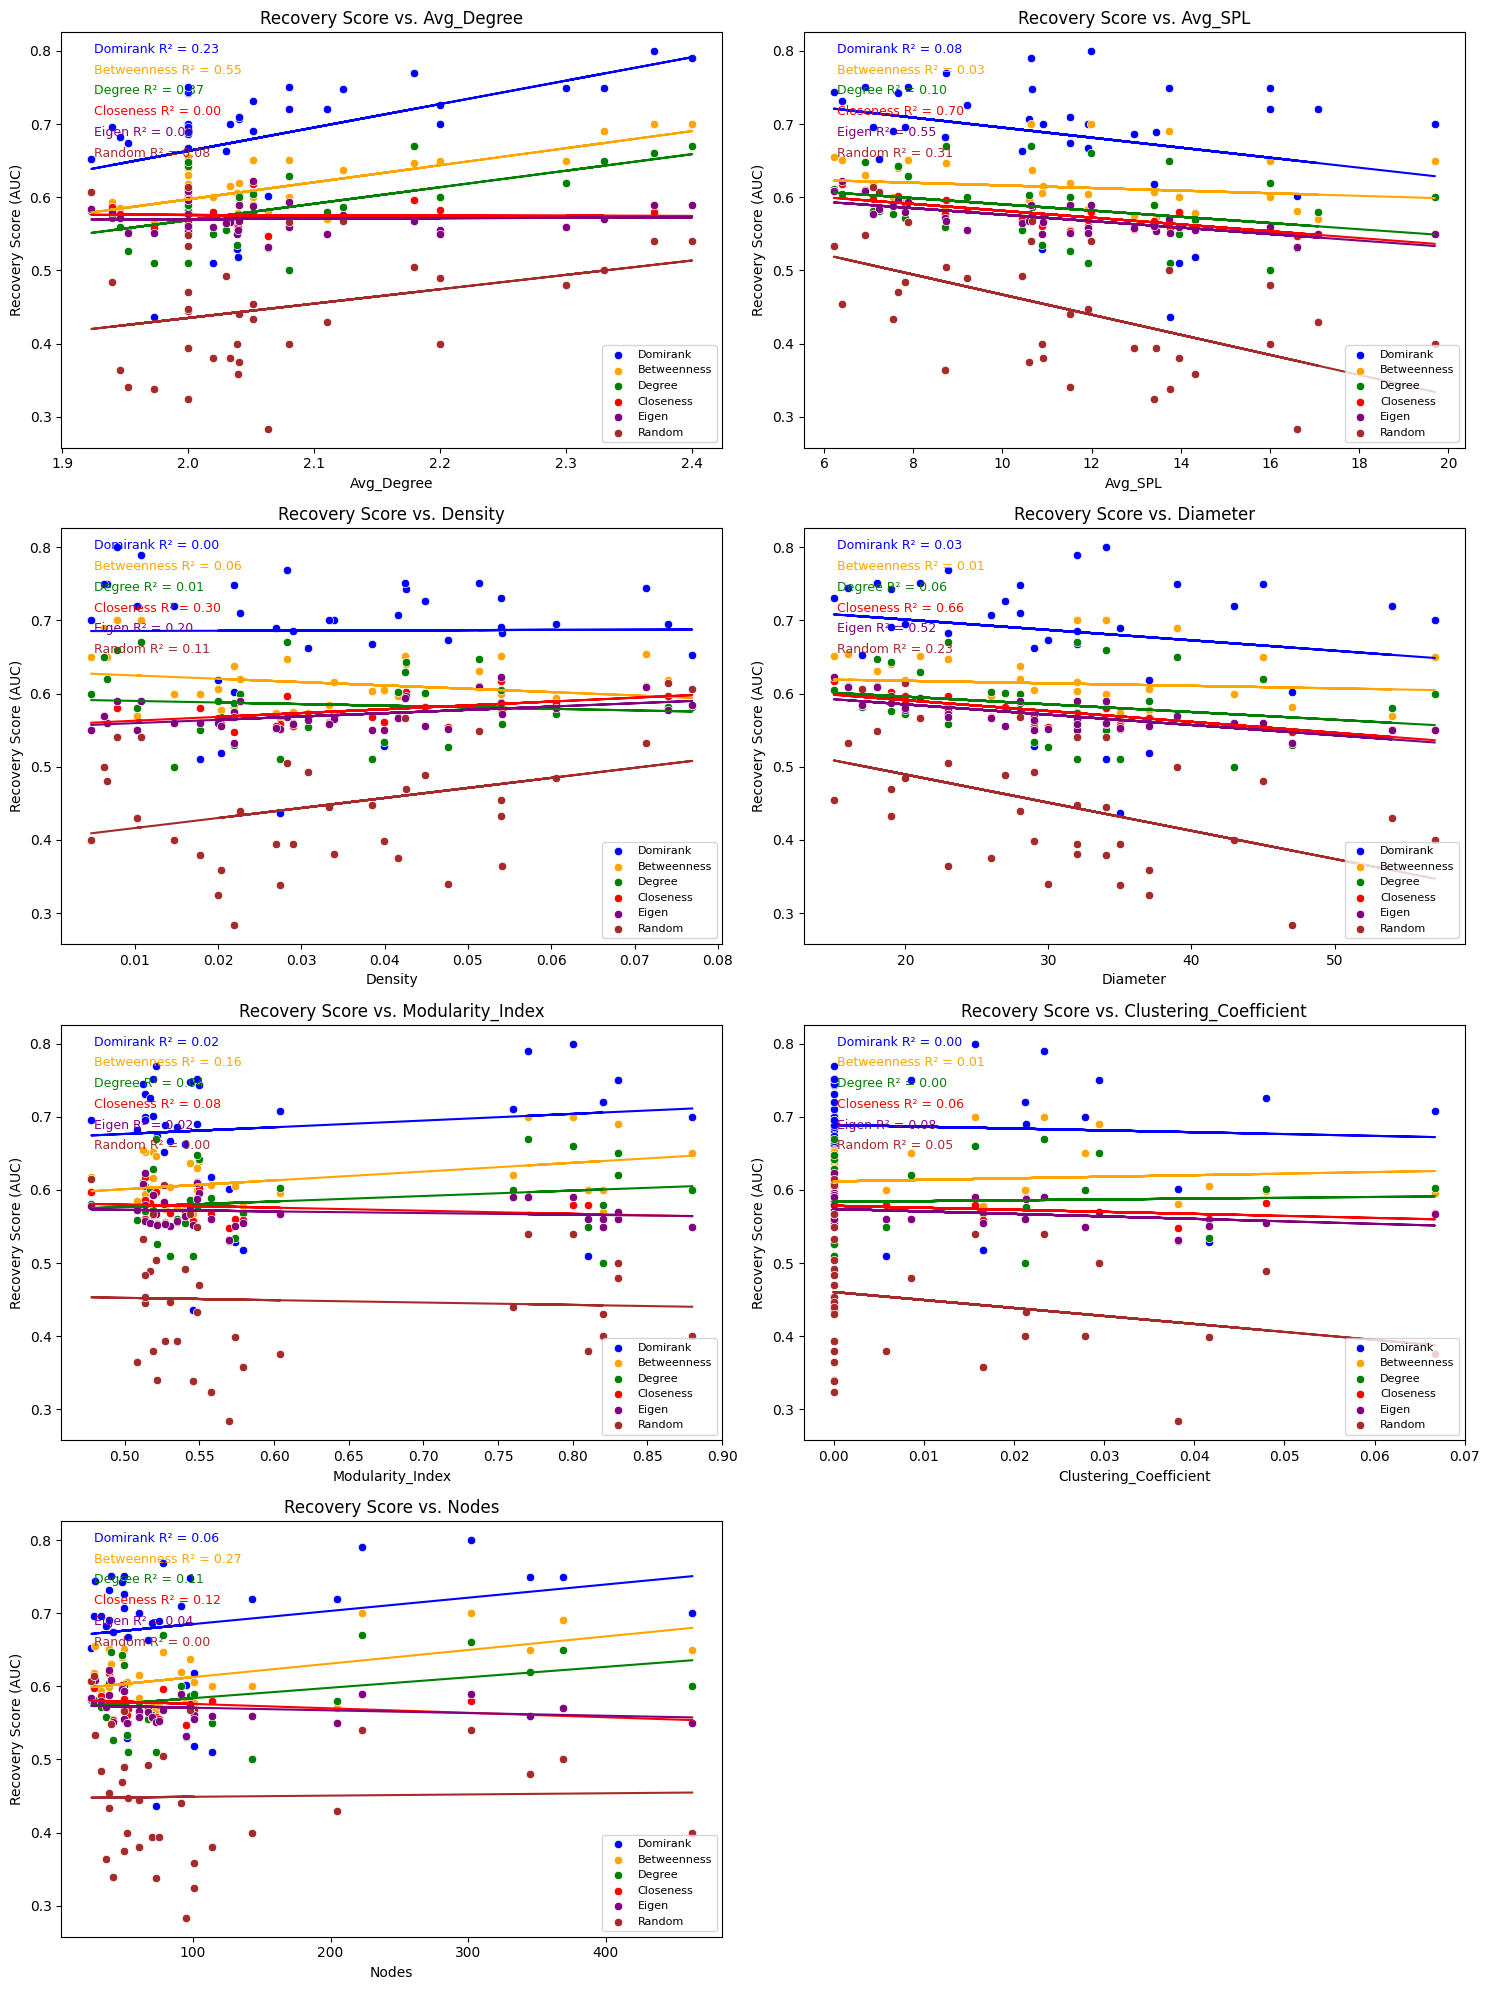

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import pickle
import pandas as pd

# Load the results from the recovery_results.pkl file
with open('recovery_results.pkl', 'rb') as f:
    recovery_results = pickle.load(f)

# Extract network attributes and recovery AUC scores from the results
network_attr_df = pd.DataFrame(
    {city: {**metrics, **metrics["Recovery_AUC"]} for city, metrics in recovery_results.items()}
).T

# Separate network attributes and recovery methods into different DataFrames
topological_metrics = ['Avg_Degree', 'Avg_SPL', 'Density', 'Diameter', 'Modularity_Index', 'Clustering_Coefficient', 'Nodes']
recovery_methods = ['Domirank', 'Betweenness', 'Degree', 'Closeness', 'Eigen', 'Random']
# recovery_methods = ['Betweenness','Domirank', 'Degree']

# Prepare the DataFrames
auc_df = network_attr_df[recovery_methods]
network_attr_df = network_attr_df[topological_metrics]

# Function to create scatter plot with linear fit
def plot_with_trendline(x, y, label, color, ax):
    sns.scatterplot(x=x, y=y, ax=ax, label=label, color=color)
    # Fit a linear regression line
    model = LinearRegression()
    x_array = np.array(x).reshape(-1, 1)
    model.fit(x_array, y)
    trendline = model.predict(x_array)
    ax.plot(x, trendline, color=color)
    return model.score(x_array, y)  # Return R^2 value

# Determine the number of subplots needed
n_metrics = len(topological_metrics)  # 7 metrics
n_cols = 2
n_rows = (n_metrics + n_cols - 1) // n_cols  # Ceiling division to get enough rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

for i, metric in enumerate(topological_metrics):
    ax = axes[i]
    
    for j, method in enumerate(recovery_methods):
        x = network_attr_df[metric]  # Topological metric
        y = auc_df[method]  # Recovery method performance (AUC)
        r2 = plot_with_trendline(x, y, method, colors[j], ax)  # Plot data and trendline
        
        # Display R² value in plot
        ax.text(0.05, 0.95 - j * 0.05, f'{method} R² = {r2:.2f}', transform=ax.transAxes, color=colors[j], fontsize=9)

    ax.set_title(f'Recovery Score vs. {metric}')
    ax.set_xlabel(metric)
    ax.set_ylabel('Recovery Score (AUC)')
    ax.legend(loc='lower right', fontsize=8)

# Remove any unused subplots
if len(axes) > n_metrics:
    for idx in range(n_metrics, len(axes)):
        fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig("fit_lines_recovery", bbox_inches='tight')
plt.show()


## Recovery Box Plot

C:\Users\orije\AppData\Local\Temp\ipykernel_41176\2417368436.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['Random', 'Eigenvector', 'Closeness', 'Degree', 'Betweenness', 'Domirank'])


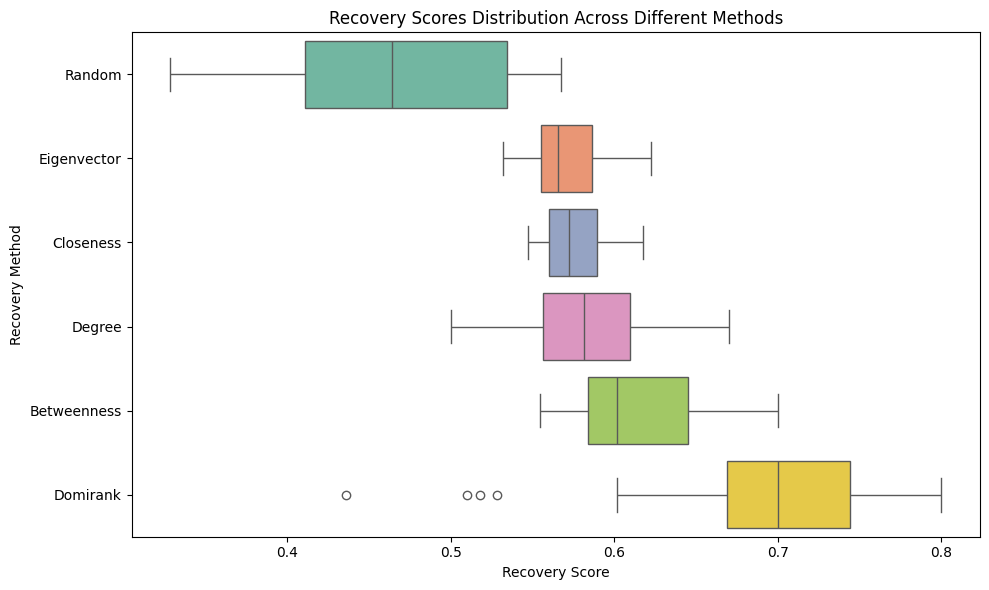

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

# Load the recovery results data from the pickle file
with open('recovery_results.pkl', 'rb') as file:
    recovery_results = pickle.load(file)

# Extract the AUC data (recovery scores) from the results
recovery_auc_data = pd.DataFrame(
    {city: metrics["Recovery_AUC"] for city, metrics in recovery_results.items()}
).T

# Reorder the columns to match the required sequence: 
# 'Random', 'Eigen', 'Closeness', 'Degree', 'Betweenness', 'Domirank'
reordered_recovery_auc_data = recovery_auc_data[['Random', 'Eigen', 'Closeness', 'Degree', 'Betweenness', 'Domirank']]

# Create a box plot for recovery scores across different recovery methods
plt.figure(figsize=(10, 6))
sns.boxplot(data=reordered_recovery_auc_data, orient='h', palette='Set2')

# Set correct order of labels from top to bottom
plt.gca().set_yticklabels(['Random', 'Eigenvector', 'Closeness', 'Degree', 'Betweenness', 'Domirank'])

# Add plot title and labels
plt.title('Recovery Scores Distribution Across Different Methods')
plt.xlabel('Recovery Score')
plt.ylabel('Recovery Method')

# Show the plot
plt.tight_layout()
plt.savefig("recovery_boxplot.png")
plt.show()


## All plot in one plot

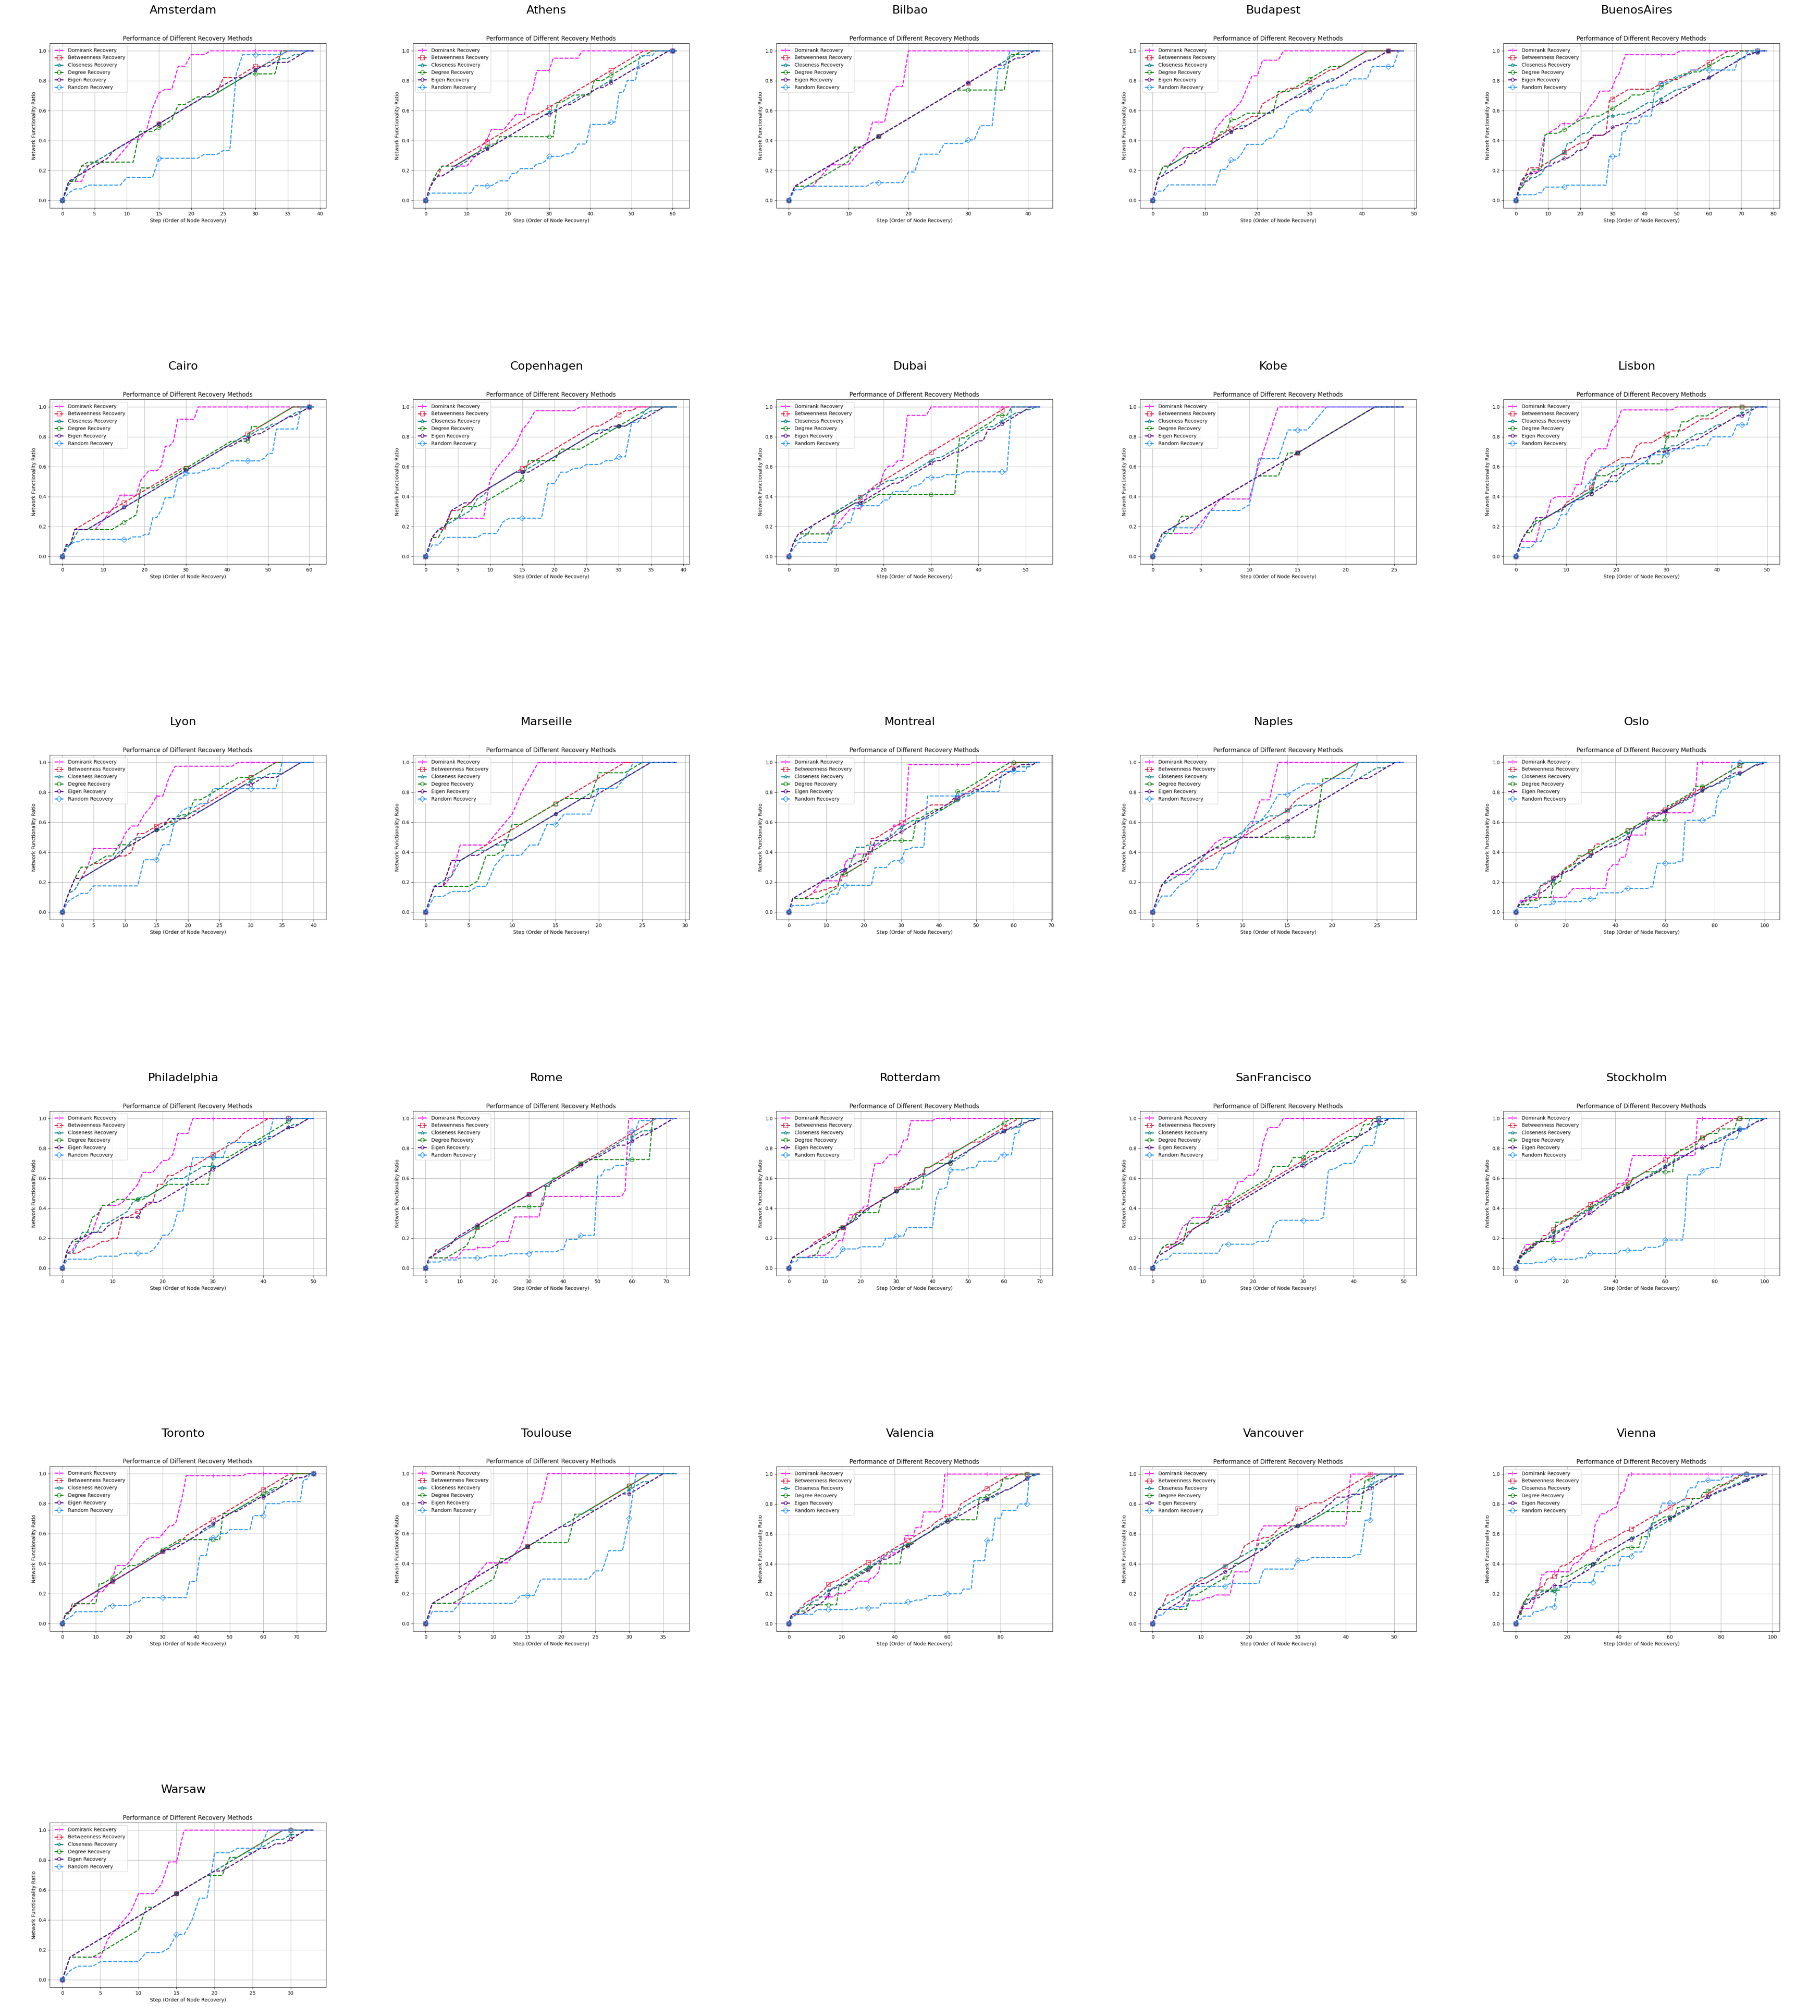

In [37]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Path to the directory where the recovery plots are stored
directory = "recovery_graphs"

# Get a list of all the image file names in the directory
image_files = [f for f in os.listdir(directory) if f.endswith('.png')]

# Sort the image files to ensure they are displayed in order (optional)
image_files.sort()

# Number of images (assuming they follow the format {city_name}_recovery_plot.png)
num_images = len(image_files)

# Define the grid size (e.g., 6 rows and 5 columns for 26 images)
n_rows = 6
n_cols = 5

# Create a figure to hold the subplots (increase figsize for larger plots)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(35, 42))  # Larger figsize for bigger plots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each image file and add it to the corresponding subplot
for i, image_file in enumerate(image_files[:n_rows * n_cols]):  # Ensure not to exceed number of subplots
    # Load the image
    img_path = os.path.join(directory, image_file)
    img = Image.open(img_path)
    
    # Extract the city name from the filename (removing '_recovery_plot' and file extension)
    city_name = os.path.splitext(image_file.replace('_recovery_plot', ''))[0]
    
    # Display the image in the corresponding subplot
    axes[i].imshow(img)
    axes[i].axis('off')  # Turn off the axis for cleaner display
    axes[i].set_title(f"{city_name}", fontsize=16)  # Use the city name as the title

# Remove any unused subplots (if there are less than n_rows * n_cols images)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing and reduced padding
plt.tight_layout(pad=1.0)  # Reduce padding between plots by lowering the 'pad' value

# Save the figure as a PNG file
output_path = "combined_recovery_plots.png"
plt.savefig(output_path, bbox_inches='tight')  # Save the figure

# Show the plot
plt.show()


## Fit of the Recovery AUC


Strategy: Domirank
Coefficients: [ 1.61419590e-04  2.09052582e-01 -4.66023024e-02 -2.42880010e-01
  1.05168075e-02  8.83858695e-02 -6.49906235e-01]
Intercept: 0.4030740182042707
Mean Squared Error: 0.0030
R-squared: 0.5365


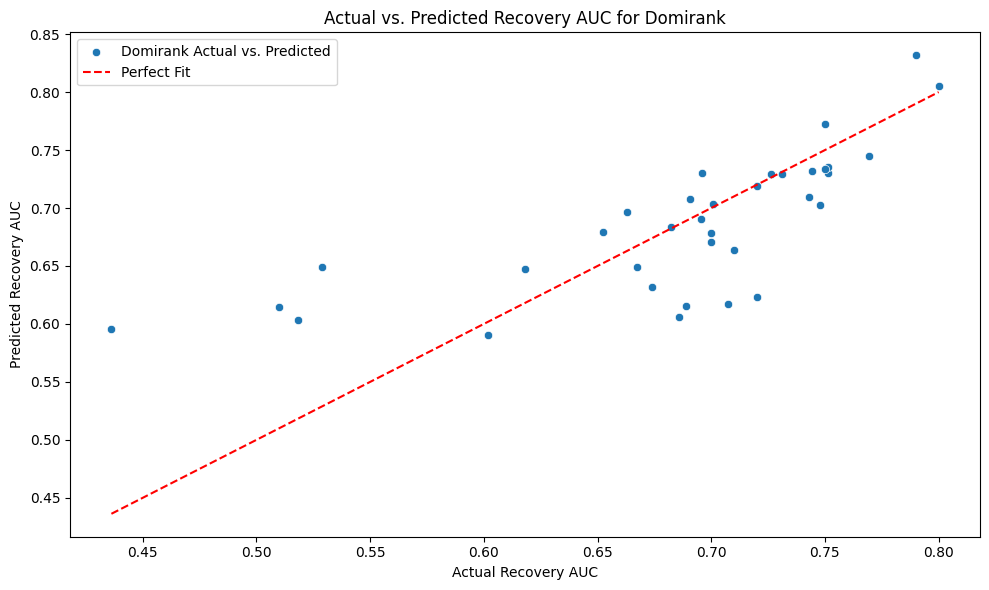


Strategy: Betweenness
Coefficients: [ 2.50120669e-04  9.69120424e-02 -8.28283744e-03 -6.15291404e-01
 -1.01853462e-03  1.38068418e-02 -6.64721927e-02]
Intercept: 0.5241564662369249
Mean Squared Error: 0.0002
R-squared: 0.8301


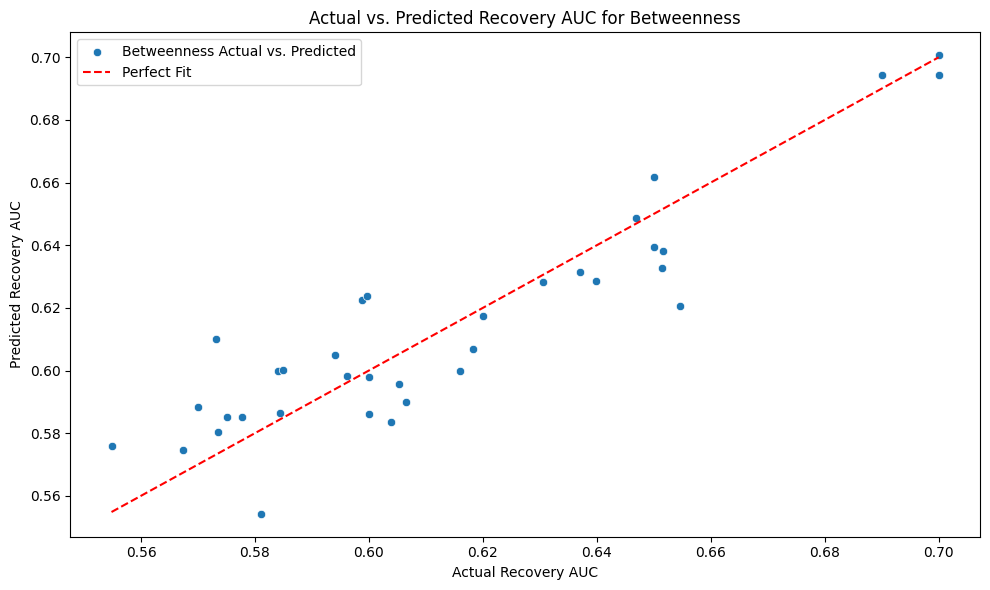


Strategy: Degree
Coefficients: [ 3.35232265e-04 -2.66464109e-02 -2.53205968e-02 -1.62298762e+00
  2.26847427e-03 -2.12357737e-02  1.90773037e-01]
Intercept: 0.886999907689484
Mean Squared Error: 0.0005
R-squared: 0.7617


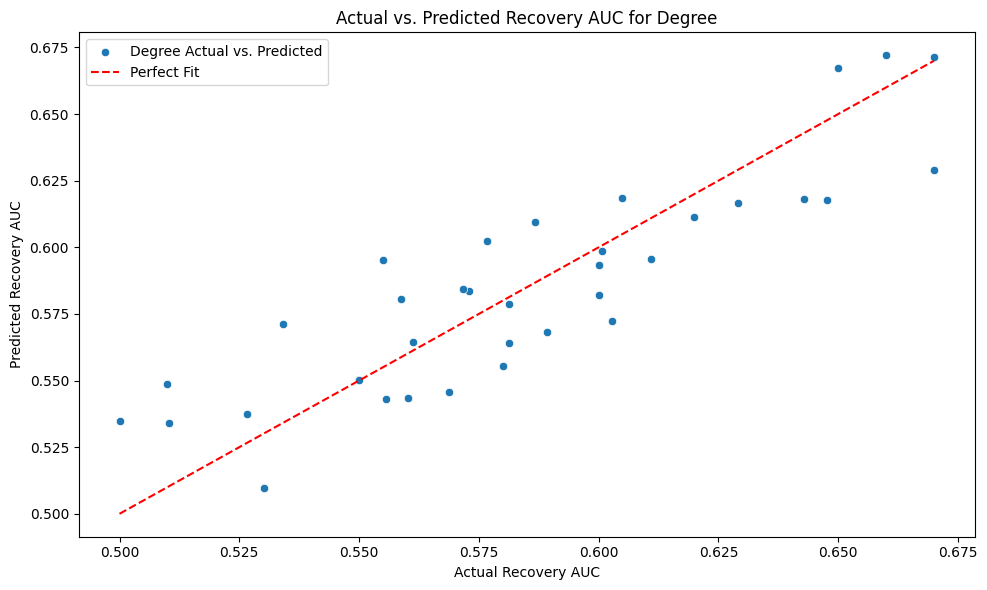


Strategy: Closeness
Coefficients: [ 4.76755469e-06  7.89243282e-03 -5.45224725e-03 -8.61965191e-02
 -4.12321860e-04  6.42616901e-02 -1.35501975e-01]
Intercept: 0.5981516586240885
Mean Squared Error: 0.0001
R-squared: 0.8538


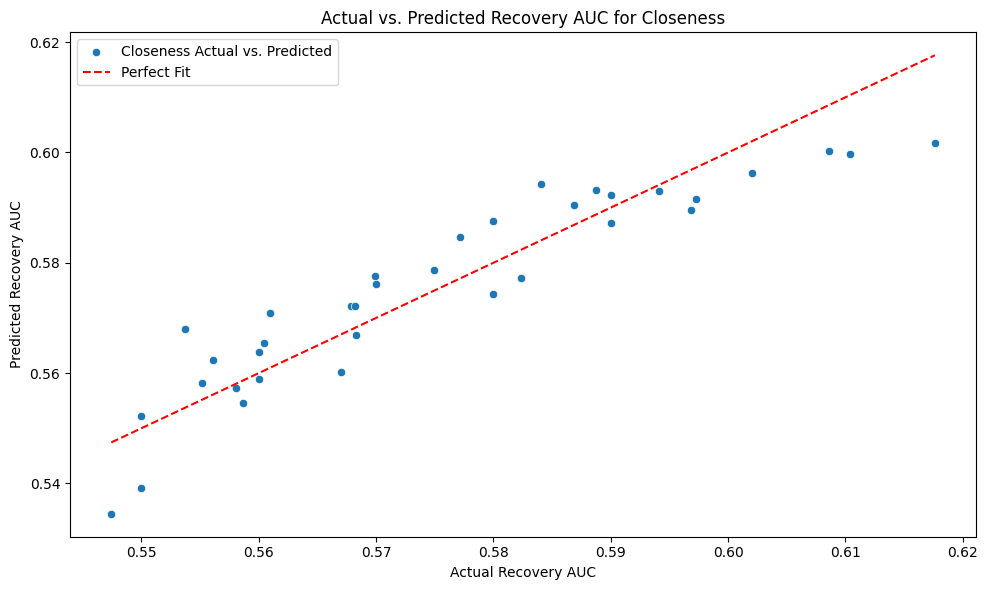


Strategy: Eigen
Coefficients: [ 7.64523135e-05 -4.40142088e-02 -7.35403612e-03 -3.01252876e-01
 -4.54005920e-04  7.60055226e-02 -1.46049393e-01]
Intercept: 0.7160429295646571
Mean Squared Error: 0.0001
R-squared: 0.8253


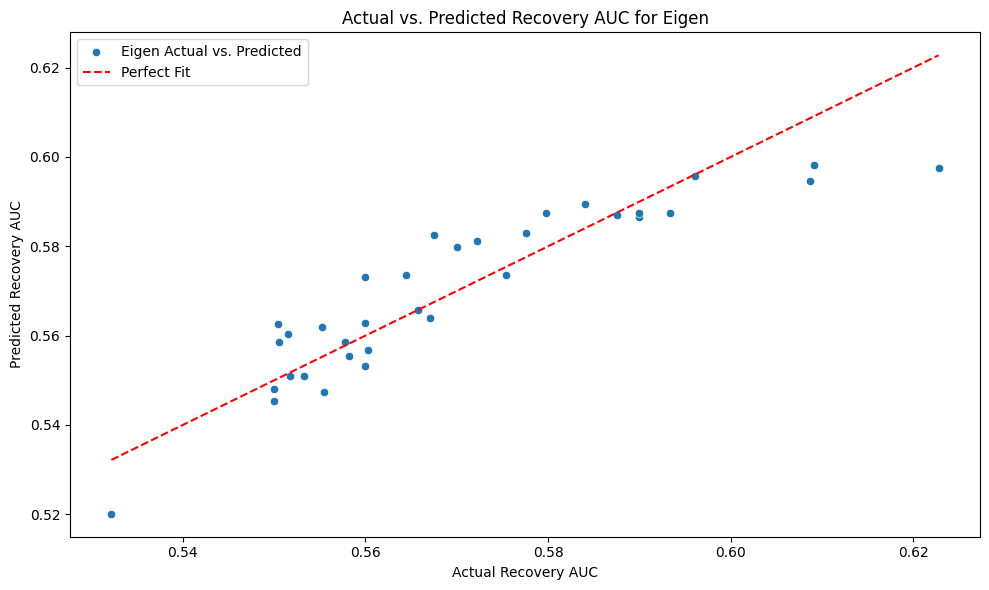


Strategy: Random
Coefficients: [ 4.08114797e-05  4.91432087e-01 -1.40851521e-02  2.63854574e+00
  1.62642309e-03  1.63471442e-01 -1.77018482e+00]
Intercept: -0.6343598443688001
Mean Squared Error: 0.0020
R-squared: 0.7001


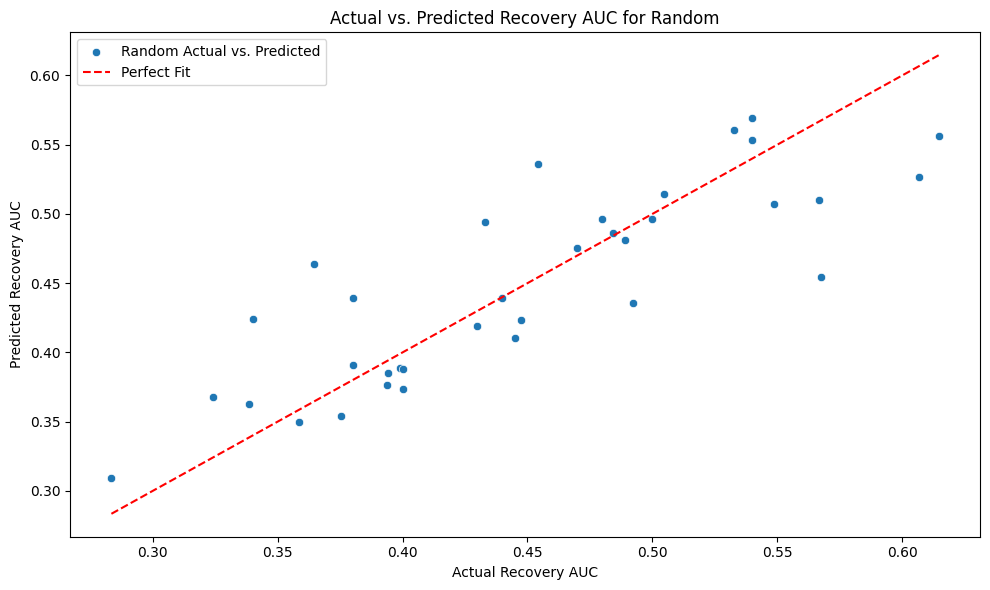

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Load the results from the pickle file
with open('recovery_results.pkl', 'rb') as f:
    results = pickle.load(f)

# Extract network attributes and Recovery AUC scores from results
network_attr_df = pd.DataFrame({city: res for city, res in results.items()}).T  # Extract attributes
auc_df = pd.DataFrame({city: res['Recovery_AUC'] for city, res in results.items()}).T  # Extract Recovery AUC

# Prepare feature matrix (X) and target vectors (Y) for each recovery strategy
X = network_attr_df[['Nodes', 'Avg_Degree', 'Avg_SPL', 'Density', 'Diameter', 'Modularity_Index', 'Clustering_Coefficient']]

# Iterate over all recovery strategies
for strategy in auc_df.columns:
    Y = auc_df[strategy]

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, Y)
    Y_pred = model.predict(X)

    # Print model evaluation metrics
    print(f"\nStrategy: {strategy}")
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    print(f"Mean Squared Error: {mean_squared_error(Y, Y_pred):.4f}")
    print(f"R-squared: {r2_score(Y, Y_pred):.4f}")

    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=Y, y=Y_pred, label=f'{strategy} Actual vs. Predicted')
    plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', label='Perfect Fit')
    plt.title(f'Actual vs. Predicted Recovery AUC for {strategy}')
    plt.xlabel('Actual Recovery AUC')
    plt.ylabel('Predicted Recovery AUC')
    plt.legend()
    plt.tight_layout()
    plt.show()



Strategy: Domirank
Coefficients: [ 2.96425232e-04  3.34362860e-01 -7.22083568e-03  6.32220542e-02
 -6.95041727e-04 -2.10241886e-01 -6.92012098e-01]
Intercept: 0.20303083717491816
Mean Squared Error: 0.0106
R-squared: 0.2404


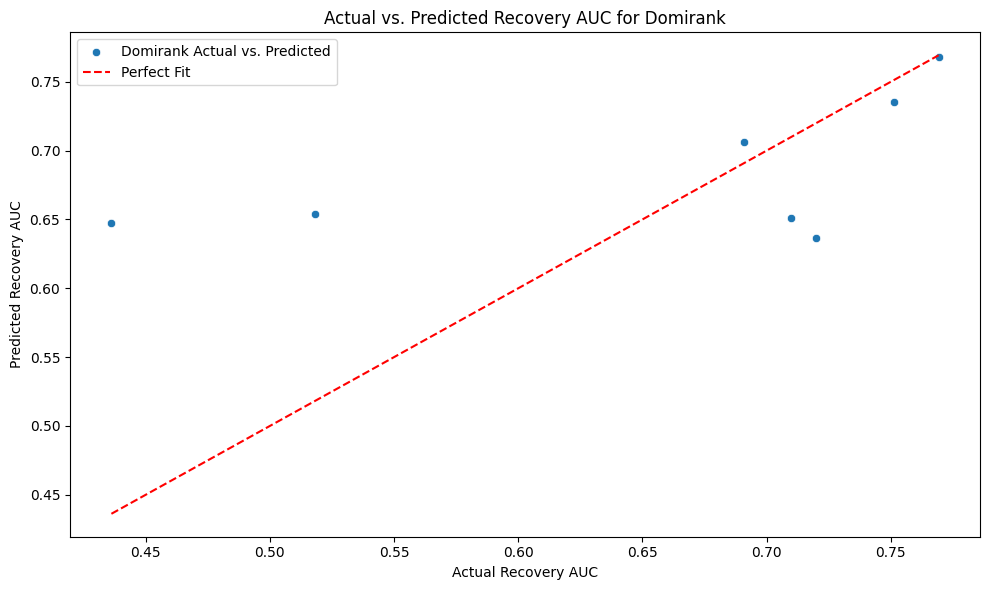


Strategy: Betweenness
Coefficients: [ 1.97781166e-04  7.44533179e-02 -1.47987923e-02 -5.66149315e-01
  1.48239934e-03  6.85728170e-02 -8.38483226e-02]
Intercept: 0.5404818758934761
Mean Squared Error: 0.0004
R-squared: 0.5913


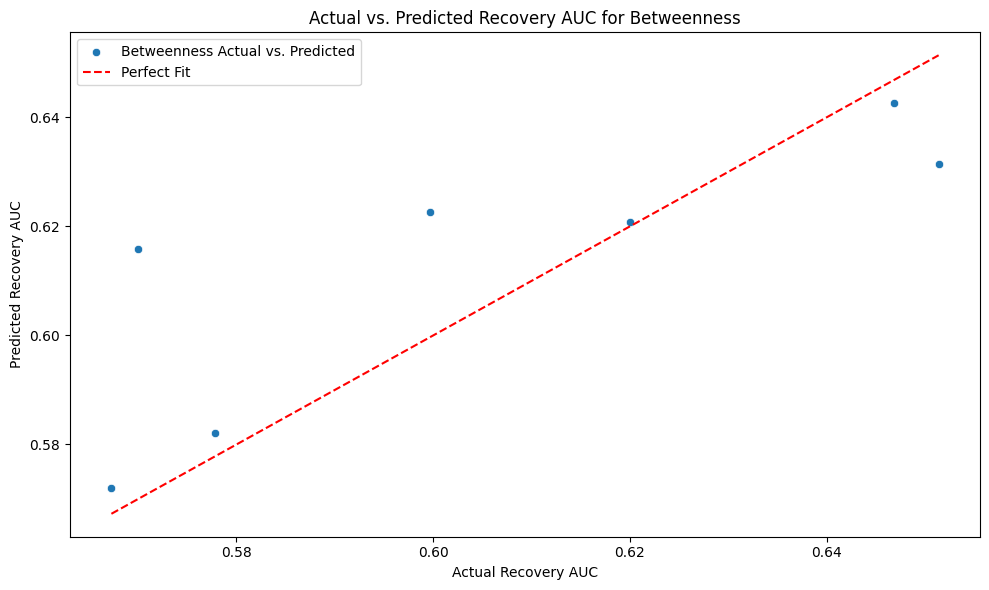


Strategy: Degree
Coefficients: [ 4.47942215e-04 -3.14813450e-02 -1.60558346e-02 -1.37850123e+00
 -9.63201997e-04 -9.39044190e-02  4.25878172e-01]
Intercept: 0.9086935897310315
Mean Squared Error: 0.0013
R-squared: 0.3979


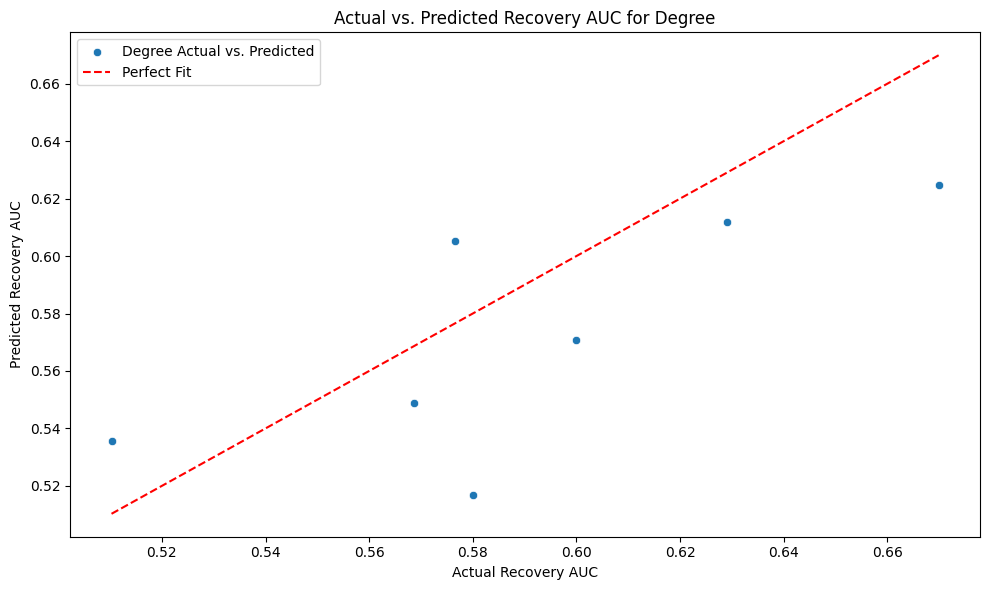


Strategy: Closeness
Coefficients: [ 4.09463832e-07 -7.39693102e-03 -8.20088626e-03 -5.61384210e-02
  5.23990750e-04  8.22176152e-02 -1.13194714e-01]
Intercept: 0.6202635894294656
Mean Squared Error: 0.0000
R-squared: 0.8714


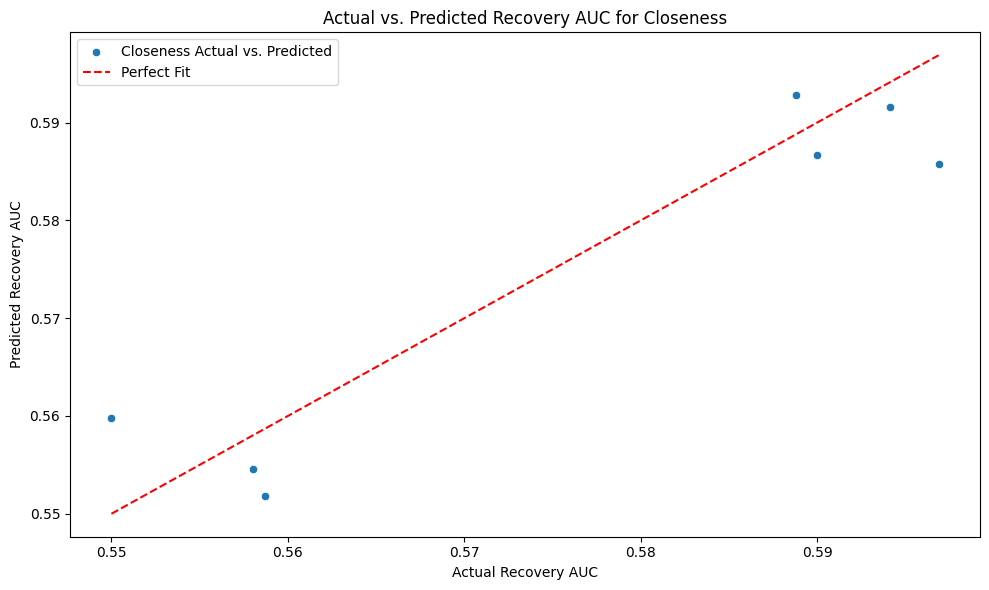


Strategy: Eigen
Coefficients: [ 8.37357693e-05 -2.42655568e-02 -5.74850466e-03 -2.92677655e-01
 -1.01920486e-03  5.58596636e-02 -1.64999186e-01]
Intercept: 0.685332793789771
Mean Squared Error: 0.0001
R-squared: 0.7565


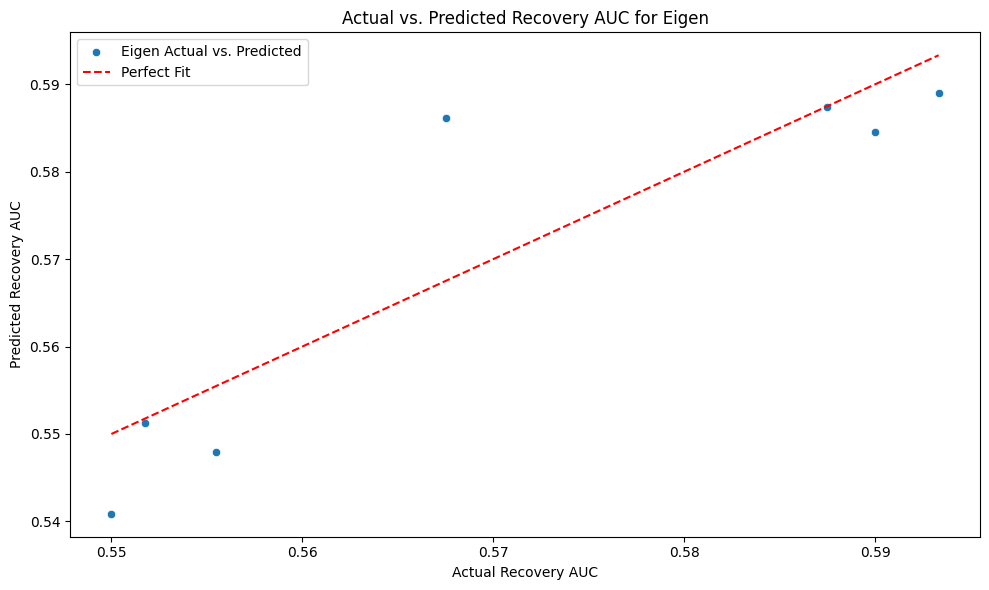


Strategy: Random
Coefficients: [ 8.91291996e-05  5.25922756e-01 -2.51492612e-03  2.83142229e+00
 -2.25942003e-03  1.10739768e-01 -1.62295134e+00]
Intercept: -0.699151472867383
Mean Squared Error: 0.0016
R-squared: 0.7054


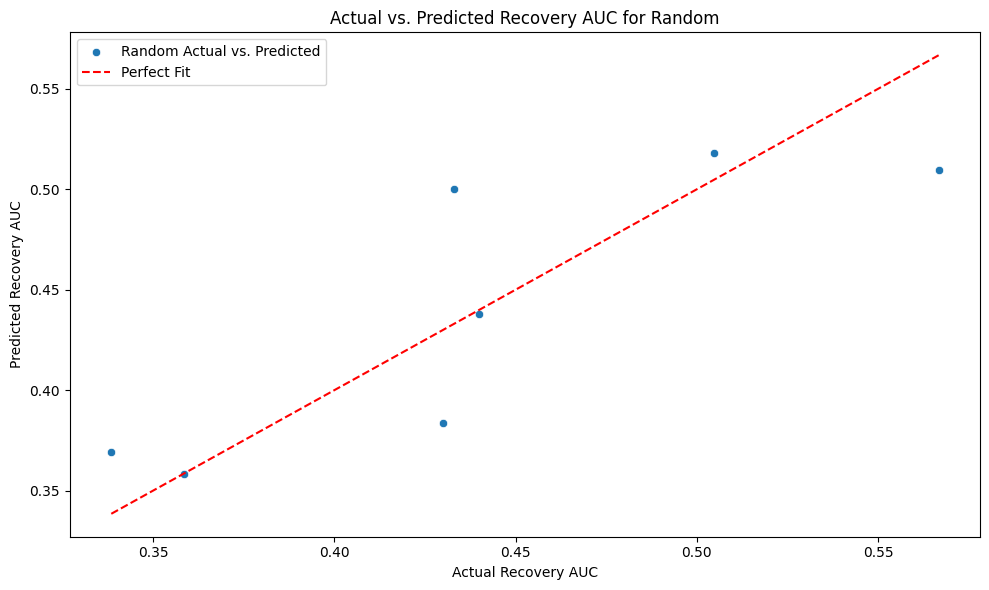

In [3]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Load the results from the pickle file
with open('recovery_results.pkl', 'rb') as f:
    results = pickle.load(f)

# Extract network attributes and Recovery AUC scores from results
network_attr_df = pd.DataFrame({city: res for city, res in results.items()}).T  # Extract attributes
auc_df = pd.DataFrame({city: res['Recovery_AUC'] for city, res in results.items()}).T  # Extract Recovery AUC

# Prepare feature matrix (X) and target vectors (Y) for each recovery strategy
X = network_attr_df[['Nodes', 'Avg_Degree', 'Avg_SPL', 'Density', 'Diameter', 'Modularity_Index', 'Clustering_Coefficient']]

# Iterate over all recovery strategies
for strategy in auc_df.columns:
    Y = auc_df[strategy]

    # Split the data into training (90%) and testing (10%) sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    # Print model evaluation metrics
    print(f"\nStrategy: {strategy}")
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred):.4f}")
    print(f"R-squared: {r2_score(Y_test, Y_pred):.4f}")

    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=Y_test, y=Y_pred, label=f'{strategy} Actual vs. Predicted')
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', label='Perfect Fit')
    plt.title(f'Actual vs. Predicted Recovery AUC for {strategy}')
    plt.xlabel('Actual Recovery AUC')
    plt.ylabel('Predicted Recovery AUC')
    plt.legend()
    plt.tight_layout()
    plt.show()